## 1. 환경 설정

`(1) Env 환경변수`

In [55]:
# @title set API key
from pprint import pprint
import os
import getpass

import warnings

warnings.filterwarnings("ignore")

UPSTAGE_API_KEY = getpass.getpass("Enter your API Key")
_ = os.environ.setdefault("UPSTAGE_API_KEY", UPSTAGE_API_KEY)

LANGCHAIN_API_KEY = getpass.getpass("Enter your API Key")
_ = os.environ.setdefault("LANGCHAIN_API_KEY", LANGCHAIN_API_KEY)

In [57]:
from dotenv import load_dotenv
load_dotenv()

False

In [59]:
!pip install pypdf==5.0.1
!pip install sentence-transformers==3.2.0
!pip install tavily-python==0.5.0

  Attempting uninstall: pypdf
    Found existing installation: pypdf 4.3.1
    Uninstalling pypdf-4.3.1:
      Successfully uninstalled pypdf-4.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-upstage 0.1.8rc0 requires pypdf<5.0.0,>=4.2.0, but you have pypdf 5.0.1 which is incompatible.
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.2.1
    Uninstalling sentence-transformers-3.2.1:
      Successfully uninstalled sentence-transformers-3.2.1


`(2) 기본 라이브러리`

In [39]:
import re
import os, json
from glob import glob

from textwrap import dedent
from pprint import pprint

import uuid

import warnings
warnings.filterwarnings("ignore")

## 2. 법률 문서를 로드하여 벡터저장소에 저장

In [40]:
# pdf 파일 목록을 확인
pdf_files = glob(os.path.join('data', '*.pdf'))

pdf_files

[]

###  2-1. 자본시장과 금융투자업에 관한 법률(법률)(제20305호)(20240814)

- PDf 문서를 가져와서 조항 별로 구분하여 정리

In [41]:
from langchain_community.document_loaders import PyPDFLoader


pdf_file = "/Users/hyuneui/Desktop/upstage/cookbook/data/자본시장과 금융투자업에 관한 법률(법률)(제20305호)(20240814).pdf"
loader = PyPDFLoader(pdf_file)
pages = loader.load()
len(pages)


216

In [42]:
pages[10].metadata

{'source': '/Users/hyuneui/Desktop/upstage/cookbook/data/자본시장과 금융투자업에 관한 법률(법률)(제20305호)(20240814).pdf',
 'page': 10}

페이지 구조를 이용해서 파싱하는 작업

- 랭체인 Document 객체에 메타데이터와 함께 정리

전체적인 맥락 -> 법률정보


- 벡터저장소에 인덱싱

- PDf 문서를 가져와서 조항 별로 구분하여 정리

In [43]:
pages[0].page_content

'법제처                                                            1                                                       국가법령정보센터\n자본시장과 금융투자업에 관한 법률 \n \n자본시장과 금융투자업에 관한 법률 ( 약칭: 자본시장법 ) \n[시행 2024. 8. 14.] [법률 제20305호, 2024. 2. 13., 일부개정] \n금융위원회 (자본시장과-투자매매중개업, 증권발행) 02-2100-2652 \n금융위원회 (자본시장과-파생상품) 02-2100-2654 \n금융위원회 (자산운용과-집합투자, 신탁, 투자일임, 투자자문) 02-2100-2661 \n금융위원회 (공정시장과-사업보고서, 상장회사특례, 불공정거래) 02-2100-2688 \n     제1편 총칙\n \n제1조(목적) 이 법은 자본시장에서의 금융혁신과 공정한 경쟁을 촉진하고 투자자를 보호하며 금융투자업을 건전하게\n육성함으로써 자본시장의 공정성ㆍ신뢰성 및 효율성을 높여 국민경제의 발전에 이바지함을 목적으로 한다.\n \n제2조(국외행위에 대한 적용) 이 법은 국외에서 이루어진 행위로서 그 효과가 국내에 미치는 경우에도 적용한다.\n \n제3조(금융투자상품) ① 이 법에서 “금융투자상품”이란 이익을 얻거나 손실을 회피할 목적으로 현재 또는 장래의 특정\n(特定) 시점에 금전, 그 밖의 재산적 가치가 있는 것(이하 “금전등”이라 한다)을 지급하기로 약정함으로써 취득하는\n권리로서, 그 권리를 취득하기 위하여 지급하였거나 지급하여야 할 금전등의 총액(판매수수료 등 대통령령으로 정하\n는 금액을 제외한다)이 그 권리로부터 회수하였거나 회수할 수 있는 금전등의 총액(해지수수료 등 대통령령으로 정\n하는 금액을 포함한다)을 초과하게 될 위험(이하 “투자성”이라 한다)이 있는 것을 말한다. 다만, 다음 각 호의 어느 하\n나에 해당하는 것을 제외한다. <개정 2011. 7. 25., 2013. 5. 28.>\

In [44]:
pages[1].page_content

'법제처                                                            2                                                       국가법령정보센터\n자본시장과 금융투자업에 관한 법률 \n② 제1항의 증권은 다음 각 호와 같이 구분한다.\n1. 채무증권\n2. 지분증권\n3. 수익증권\n4. 투자계약증권\n5. 파생결합증권\n6. 증권예탁증권\n③ 이 법에서 “채무증권”이란 국채증권, 지방채증권, 특수채증권(법률에 의하여 직접 설립된 법인이 발행한 채권을\n말한다. 이하 같다), 사채권(「상법」 제469조제2항제3호에 따른 사채의 경우에는 제7항제1호에 해당하는 것으로 한\n정한다. 이하 같다), 기업어음증권(기업이 사업에 필요한 자금을 조달하기 위하여 발행한 약속어음으로서 대통령령\n으로 정하는 요건을 갖춘 것을 말한다. 이하 같다), 그 밖에 이와 유사(類似)한 것으로서 지급청구권이 표시된 것을\n말한다.<개정 2013. 5. 28.>\n④ 이 법에서 “지분증권”이란 주권, 신주인수권이 표시된 것, 법률에 의하여 직접 설립된 법인이 발행한 출자증권, 「\n상법」에 따른 합자회사ㆍ유한책임회사ㆍ유한회사ㆍ합자조합ㆍ익명조합의 출자지분, 그 밖에 이와 유사한 것으로\n서 출자지분 또는 출자지분을 취득할 권리가 표시된 것을 말한다.<개정 2013. 5. 28.>\n⑤ 이 법에서 “수익증권”이란 제110조의 수익증권, 제189조의 수익증권, 그 밖에 이와 유사한 것으로서 신탁의 수익\n권이 표시된 것을 말한다.\n⑥ 이 법에서 “투자계약증권”이란 특정 투자자가 그 투자자와 타인(다른 투자자를 포함한다. 이하 이 항에서 같다)\n간의 공동사업에 금전등을 투자하고 주로 타인이 수행한 공동사업의 결과에 따른 손익을 귀속받는 계약상의 권리\n가 표시된 것을 말한다.\n⑦ 이 법에서 “파생결합증권”이란 기초자산의 가격ㆍ이자율ㆍ지표ㆍ단위 또는 이를 기초로 하는 지수 등의 변동과\n연계하여 미리 정하

In [45]:
pages[2].page_content

'법제처                                                            3                                                       국가법령정보센터\n자본시장과 금융투자업에 관한 법률 \n1. 금융투자상품\n2. 통화(외국의 통화를 포함한다)\n3. 일반상품(농산물ㆍ축산물ㆍ수산물ㆍ임산물ㆍ광산물ㆍ에너지에 속하는 물품 및 이 물품을 원료로 하여 제조하거\n나 가공한 물품, 그 밖에 이와 유사한 것을 말한다) \n4. 신용위험(당사자 또는 제삼자의 신용등급의 변동, 파산 또는 채무재조정 등으로 인한 신용의 변동을 말한다)\n5. 그 밖에 자연적ㆍ환경적ㆍ경제적 현상 등에 속하는 위험으로서 합리적이고 적정한 방법에 의하여 가격ㆍ이자율\nㆍ지표ㆍ단위의 산출이나 평가가 가능한 것 \n \n제5조(파생상품) ① 이 법에서 “파생상품”이란 다음 각 호의 어느 하나에 해당하는 계약상의 권리를 말한다. 다만, 해당\n금융투자상품의 유통 가능성, 계약당사자, 발행사유 등을 고려하여 증권으로 규제하는 것이 타당한 것으로서 대통령\n령으로 정하는 금융투자상품은 그러하지 아니하다. <개정 2013. 5. 28.>\n1. 기초자산이나 기초자산의 가격ㆍ이자율ㆍ지표ㆍ단위 또는 이를 기초로 하는 지수 등에 의하여 산출된 금전등을\n장래의 특정 시점에 인도할 것을 약정하는 계약 \n2. 당사자 어느 한쪽의 의사표시에 의하여 기초자산이나 기초자산의 가격ㆍ이자율ㆍ지표ㆍ단위 또는 이를 기초로\n하는 지수 등에 의하여 산출된 금전등을 수수하는 거래를 성립시킬 수 있는 권리를 부여하는 것을 약정하는 계약 \n3. 장래의 일정기간 동안 미리 정한 가격으로 기초자산이나 기초자산의 가격ㆍ이자율ㆍ지표ㆍ단위 또는 이를 기초\n로 하는 지수 등에 의하여 산출된 금전등을 교환할 것을 약정하는 계약 \n4. 제1호부터 제3호까지의 규정에 따른 계약과 유사한 것으로서 대통령령으로 정하는 계약\n② 이 법에서 “장내파생상품”이란 다음 각 호

In [46]:
def parse_law(law_text):
    # 서문 분리
    # '^'로 시작하여 '제1장' 또는 '제1조' 직전까지의 모든 텍스트를 탐색 
    preamble_pattern = r'^(.*?)(?=제1장|제1조)'
    preamble = re.search(preamble_pattern, law_text, re.DOTALL)
    if preamble:
        preamble = preamble.group(1).strip()
    
    # 장 분리 
    # '제X장' 형식의 제목과 그 뒤에 오는 모든 조항을 하나의 그룹화 
    chapter_pattern = r'(제\d+장\s+.+?)\n((?:제\d+조(?:의\d+)?(?:\(\w+\))?.*?)(?=제\d+장|부칙|$))'
    chapters = re.findall(chapter_pattern, law_text, re.DOTALL)
    
    # 부칙 분리
    # '부칙'으로 시작하는 모든 텍스트를 탐색 
    appendix_pattern = r'(부칙.*)'
    appendix = re.search(appendix_pattern, law_text, re.DOTALL)
    if appendix:
        appendix = appendix.group(1)
    
    # 파싱 결과를 저장할 딕셔너리 초기화
    parsed_law = {'서문': preamble, '장': {}, '부칙': appendix}
    
    # 각 장 내에서 조 분리
    for chapter_title, chapter_content in chapters:
        # 조 분리 패턴
        # 1. '제X조'로 시작 ('제X조의Y' 형식도 가능)
        # 2. 조 번호 뒤에 반드시 '(항목명)' 형식의 제목이 와야 함 
        # 3. 다음 조가 시작되기 전까지 또는 문서의 끝까지의 모든 내용을 포함
        article_pattern = r'(제\d+조(?:의\d+)?\s*\([^)]+\).*?)(?=제\d+조(?:의\d+)?\s*\([^)]+\)|$)'
        
        # 정규표현식을 이용해 모든 조항을 탐색 
        articles = re.findall(article_pattern, chapter_content, re.DOTALL)
        
        # 각 조항의 앞뒤 공백을 제거하고 결과 딕셔너리에 저장
        parsed_law['장'][chapter_title.strip()] = [article.strip() for article in articles]
    
    return parsed_law



In [47]:
# 각 페이지의 텍스트를 결합하여 재분리
text_for_delete = r"법제처\s+\d+\s+국가법령정보센터\n자본시장과 금융투자업에 관한 법률 시행령"

law_text = "\n".join([re.sub(text_for_delete, "", p.page_content).strip() for p in pages])

parsed_law = parse_law(law_text)

# 분할된 아이템 갯수 확인
print(len(parsed_law["장"]))

40


In [48]:
parsed_law

{'서문': '법제처                                                            1                                                       국가법령정보센터\n자본시장과 금융투자업에 관한 법률 \n \n자본시장과 금융투자업에 관한 법률 ( 약칭: 자본시장법 ) \n[시행 2024. 8. 14.] [법률 제20305호, 2024. 2. 13., 일부개정] \n금융위원회 (자본시장과-투자매매중개업, 증권발행) 02-2100-2652 \n금융위원회 (자본시장과-파생상품) 02-2100-2654 \n금융위원회 (자산운용과-집합투자, 신탁, 투자일임, 투자자문) 02-2100-2661 \n금융위원회 (공정시장과-사업보고서, 상장회사특례, 불공정거래) 02-2100-2688 \n     제1편 총칙',
 '장': {'제1장 금융투자업의 인가 및 등록\n         제1절 인가요건 및 절차': ['제11조(무인가 영업행위 금지) 누구든지 이 법에 따른 금융투자업인가(변경인가를 포함한다)를 받지 아니하고는 금융\n투자업(투자자문업, 투자일임업 및 일반 사모집합투자업은 제외한다. 이하 이 절에서 같다)을 영위하여서는 아니 된\n다. <개정 2015. 7. 24., 2021. 4. 20.>',
   '제11조의2(알선ㆍ중개행위 금지) 누구든지 제11조에 따른 무인가 영업행위를 목적으로 계좌의 대여를 알선하거나 중\n개하여서는 아니 된다.\n[본조신설 2021. 6. 8.]',
   '제12조(금융투자업의 인가) ① 금융투자업을 영위하려는 자는 다음 각 호의 사항을 구성요소로 하여 대통령령으로 정\n하는 업무 단위(이하 “인가업무 단위”라 한다)의 전부나 일부를 선택하여 금융위원회로부터 하나의 금융투자업인가\n를 받아야 한다. <개정 2008. 2. 29.>\n1. 금융투자업의 종류(투자매매업, 투자중개업, 집합투자업 및 신탁업을 말하되, 투자매매업 중 인수업을 포함한다)\n2. 금융투자상품

- 랭체인 Document 객체에 메타데이터와 함께 정리

In [49]:
from langchain_core.documents import Document

final_docs = []
for law in parsed_law['장'].keys():
    for article in parsed_law['장'][law]:

        # metadata 내용을 정리 
        metadata = {
                "source": pdf_file,
                "chapter": law,
                "name" : "자본시장법"
                }

        # metadata 내용을 본문에 추가 
        content = f"[법률정보]\n다음 조항은 {metadata['name']} {metadata['chapter']}에서 발췌한 내용입니다.\n\n[법률조항]\n{article}"

        final_docs.append(Document(page_content=content, metadata=metadata))
        
len(final_docs)

479

In [50]:
print(final_docs[0].page_content)
print()
print(final_docs[0].metadata)

[법률정보]
다음 조항은 자본시장법 제1장 금융투자업의 인가 및 등록
         제1절 인가요건 및 절차에서 발췌한 내용입니다.

[법률조항]
제11조(무인가 영업행위 금지) 누구든지 이 법에 따른 금융투자업인가(변경인가를 포함한다)를 받지 아니하고는 금융
투자업(투자자문업, 투자일임업 및 일반 사모집합투자업은 제외한다. 이하 이 절에서 같다)을 영위하여서는 아니 된
다. <개정 2015. 7. 24., 2021. 4. 20.>

{'source': '/Users/hyuneui/Desktop/upstage/cookbook/data/자본시장과 금융투자업에 관한 법률(법률)(제20305호)(20240814).pdf', 'chapter': '제1장 금융투자업의 인가 및 등록\n         제1절 인가요건 및 절차', 'name': '자본시장법'}


In [51]:
print(final_docs[1].page_content)
print()
print(final_docs[1].metadata)

[법률정보]
다음 조항은 자본시장법 제1장 금융투자업의 인가 및 등록
         제1절 인가요건 및 절차에서 발췌한 내용입니다.

[법률조항]
제11조의2(알선ㆍ중개행위 금지) 누구든지 제11조에 따른 무인가 영업행위를 목적으로 계좌의 대여를 알선하거나 중
개하여서는 아니 된다.
[본조신설 2021. 6. 8.]

{'source': '/Users/hyuneui/Desktop/upstage/cookbook/data/자본시장과 금융투자업에 관한 법률(법률)(제20305호)(20240814).pdf', 'chapter': '제1장 금융투자업의 인가 및 등록\n         제1절 인가요건 및 절차', 'name': '자본시장법'}


- 벡터저장소에 인덱싱

In [52]:
# 각 문서의 텍스트 길이를 확인

text_lengths = [len(d.page_content) for d in final_docs]
print(min(text_lengths), max(text_lengths))

66 4956


In [56]:
from langchain_chroma import Chroma
from langchain_upstage import ChatUpstage, UpstageEmbeddings
from langchain_core.vectorstores import VectorStore
from langchain_chroma import Chroma
# from langchain.embeddings.openai import OpenAIEmbeddings

# OpenAI Embeddings 모델 초기화
embeddings_model = UpstageEmbeddings(model="solar-embedding-1-large")


# Chroma 인덱스 생성
labor_db = Chroma.from_documents(
    documents=final_docs, 
    embedding=embeddings_model,    
    collection_name="labor_law",
    persist_directory="./chroma_db",
)

In [60]:
from langchain.embeddings import OpenAIEmbeddings
from langchain_chroma import Chroma
from langchain_core.documents import Document
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import CrossEncoderReranker
from langchain_community.cross_encoders import HuggingFaceCrossEncoder
from langchain_community.retrievers import TavilySearchAPIRetriever
from langchain_core.tools import tool
from typing import List
# CrossEncoder 리랭크 모델 설정
rerank_model = HuggingFaceCrossEncoder(model_name="BAAI/bge-reranker-base")
cross_reranker = CrossEncoderReranker(model=rerank_model, top_n=3)
# # 자본시장법 검색
# labor_db = Chroma(
#     embedding_function=embeddings_model,
#     collection_name="labor_law",
#     persist_directory="./chroma_db",
# )
labor_db_retriever = ContextualCompressionRetriever(
    base_compressor=cross_reranker,
    base_retriever=labor_db.as_retriever(search_kwargs={"k":5}),
)
@tool
def labor_law_search(query: str) -> List[Document]:
    """자본시장법 법률 조항을 검색합니다."""
    docs = labor_db_retriever.invoke(query)
    if len(docs) > 0:
        return docs
    return [Document(page_content="관련 정보를 찾을 수 없습니다.")]
# 웹 검색
web_retriever = ContextualCompressionRetriever(
    base_compressor=cross_reranker,
    base_retriever=TavilySearchAPIRetriever(k=10),
)
@tool
def web_search(query: str) -> List[str]:
    """데이터베이스에 없는 정보 또는 최신 정보를 웹에서 검색합니다."""
    docs = web_retriever.invoke(query)
    formatted_docs = []
    for doc in docs:
        formatted_docs.append(
            Document(
                page_content= f'<Document href="{doc.metadata["source"]}"/>\n{doc.page_content}\n</Document>',
                metadata={"source": "web search", "url": doc.metadata["source"]}
            )
        )
    if len(formatted_docs) > 0:
        return formatted_docs
    return [Document(page_content="관련 정보를 찾을 수 없습니다.")]

config.json:   0%|          | 0.00/799 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

In [62]:
tools = [ labor_law_search, web_search]

In [63]:
print(tools)

[StructuredTool(name='labor_law_search', description='자본시장법 법률 조항을 검색합니다.', args_schema=<class 'langchain_core.utils.pydantic.labor_law_search'>, func=<function labor_law_search at 0x12c283740>), StructuredTool(name='web_search', description='데이터베이스에 없는 정보 또는 최신 정보를 웹에서 검색합니다.', args_schema=<class 'langchain_core.utils.pydantic.web_search'>, func=<function web_search at 0x12c283600>)]


In [66]:
from langchain_upstage import ChatUpstage

# 기본 LLM
llm = ChatUpstage()
 #업스테이지로 변경
# LLM에 도구 바인딩하여 추가
llm_with_tools = llm.bind_tools(tools)





In [67]:
print(llm)

client=<openai.resources.chat.completions.Completions object at 0x127afafc0> async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x12c380290> model_kwargs={} upstage_api_key=SecretStr('**********') upstage_api_base='https://api.upstage.ai/v1/solar'


In [68]:
# 벡터 검색과 웹 검색이 모두 필요한 경우
query = "자기주식으로 매매를 해도 되는지 알려주세요. 2024년 자기매매관련 개정수정이 있나요?"
ai_msg = llm_with_tools.invoke(query)
pprint(ai_msg)
print("-" * 100)
pprint(ai_msg.content)
print("-" * 100)
pprint(ai_msg.tool_calls)

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '7505a2f8-6643-4127-b2cf-c4c0fc4e4dec', 'function': {'arguments': '{"query":"자기매매"}', 'name': 'labor_law_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 59, 'prompt_tokens': 675, 'total_tokens': 734, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'solar-mini-240612', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-435a9991-4195-4418-87b9-7c5b57c05a80-0', tool_calls=[{'name': 'labor_law_search', 'args': {'query': '자기매매'}, 'id': '7505a2f8-6643-4127-b2cf-c4c0fc4e4dec', 'type': 'tool_call'}], usage_metadata={'input_tokens': 675, 'output_tokens': 59, 'total_tokens': 734, 'input_token_details': {}, 'output_token_details': {}})
----------------------------------------------------------------------------------------------------
''
--------------------------------------------------------------------------

In [69]:
from pydantic import BaseModel, Field
from typing import List, TypedDict, Annotated, Optional
from operator import add
from langchain_core.documents import Document
class CorrectiveRagState(TypedDict):
    question: str                 # 사용자의 질문
    generation: str               # LLM 생성 답변
    documents: List[Document]     # 컨텍스트 문서 (검색된 문서)
    num_generations: int          # 질문 or 답변 생성 횟수 (무한 루프 방지에 활용)
class InformationStrip(BaseModel):
    """추출된 정보에 대한 내용과 출처, 관련성 점수"""
    content: str = Field(..., description="추출된 정보 내용")
    source: str = Field(..., description="정보의 출처(법률 조항 또는 URL 등). 예시: 법조 제22조 3항 ")
    relevance_score: float = Field(..., ge=0, le=1, description="관련성 점수 (0에서 1 사이)")
    faithfulness_score: float = Field(..., ge=0, le=1, description="충실성 점수 (0에서 1 사이)")
class ExtractedInformation(BaseModel):
    strips: List[InformationStrip] = Field(..., description="추출된 정보 조각들")
    query_relevance: float = Field(..., ge=0, le=1, description="질의에 대한 전반전인 답변 가능성 점수 (0에서 1 사이)")
class RefinedQuestion(BaseModel):
    """개선된 질문과 이유"""
    question_refined : str = Field(..., description="개선된 질문")
    reason : str = Field(..., description="이유")
# 자본시장법
class PersonalRagState(CorrectiveRagState):
    rewritten_query: str   # 재작성한 질문
    extracted_info: Optional[ExtractedInformation]   # 추출된 정보 조각
    node_answer: Optional[str]

###  2-3.  산업안전보건법

- PDf 문서를 가져와서 조항 별로 구분하여 정리

- 랭체인 Document 객체에 메타데이터와 함께 정리

- 벡터저장소에 인덱싱

# 3. 도구 호출

### 3-1. 법률 정보 검색 도구, 웹 검색 도구 정의

In [ ]:
from langchain.embeddings import OpenAIEmbeddings
from langchain_chroma import Chroma
from langchain_core.documents import Document
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import CrossEncoderReranker
from langchain_community.cross_encoders import HuggingFaceCrossEncoder
from langchain_community.retrievers import TavilySearchAPIRetriever
from langchain_core.tools import tool
from typing import List


# 문서 임베딩 모델 설정
embeddings_model = OpenAIEmbeddings(model="text-embedding-ada-002") #업스테이지로 수정

# CrossEncoder 리랭크 모델 설정
rerank_model = HuggingFaceCrossEncoder(model_name="BAAI/bge-reranker-base")
cross_reranker = CrossEncoderReranker(model=rerank_model, top_n=3)


# 자본시장법 검색 
labor_db = Chroma(
    embedding_function=embeddings_model,   
    collection_name="labor_law",
    persist_directory="./chroma_db",
)

labor_db_retriever = ContextualCompressionRetriever(
    base_compressor=cross_reranker, 
    base_retriever=labor_db.as_retriever(search_kwargs={"k":5}),
)

@tool
def labor_law_search(query: str) -> List[Document]:
    """자본시장법 법률 조항을 검색합니다."""
    docs = labor_db_retriever.invoke(query)

    if len(docs) > 0:
        return docs
    
    return [Document(page_content="관련 정보를 찾을 수 없습니다.")]


# 웹 검색
web_retriever = ContextualCompressionRetriever(
    base_compressor=cross_reranker, 
    base_retriever=TavilySearchAPIRetriever(k=10),
)

@tool
def web_search(query: str) -> List[str]:
    """데이터베이스에 없는 정보 또는 최신 정보를 웹에서 검색합니다."""

    docs = web_retriever.invoke(query)

    formatted_docs = []
    for doc in docs:
        formatted_docs.append(
            Document(
                page_content= f'<Document href="{doc.metadata["source"]}"/>\n{doc.page_content}\n</Document>',
                metadata={"source": "web search", "url": doc.metadata["source"]}
            )
        )

    if len(formatted_docs) > 0:
        return formatted_docs
    
    return [Document(page_content="관련 정보를 찾을 수 없습니다.")]


In [ ]:
# 도구 목록을 정의 
tools = [ labor_law_search, web_search]

In [ ]:
tools

[StructuredTool(name='personal_law_search', description='인사규정 법률 조항을 검색합니다.', args_schema=<class 'langchain_core.utils.pydantic.personal_law_search'>, func=<function personal_law_search at 0x0000018B7D07A160>),
 StructuredTool(name='labor_law_search', description='근로기준법 법률 조항을 검색합니다.', args_schema=<class 'langchain_core.utils.pydantic.labor_law_search'>, func=<function labor_law_search at 0x0000018B7D032160>),
 StructuredTool(name='oshc_law_search', description='산업안전보건법 법률 조항을 검색합니다.', args_schema=<class 'langchain_core.utils.pydantic.oshc_law_search'>, func=<function oshc_law_search at 0x0000018B7D07A840>),
 StructuredTool(name='web_search', description='데이터베이스에 없는 정보 또는 최신 정보를 웹에서 검색합니다.', args_schema=<class 'langchain_core.utils.pydantic.web_search'>, func=<function web_search at 0x0000018B7D07B920>)]

### 3-2. LLM 모델

In [ ]:
from langchain_openai import ChatOpenAI

# 기본 LLM
llm = ChatOpenAI(model="gpt-4o-mini",
                 temperature=0,
                 streaming=True) #업스테이지로 변경

# LLM에 도구 바인딩하여 추가 
llm_with_tools = llm.bind_tools(tools)

In [ ]:
llm

ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x0000018B3BB25FD0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x0000018B3BB92890>, root_client=<openai.OpenAI object at 0x0000018B7D16BC90>, root_async_client=<openai.AsyncOpenAI object at 0x0000018B7CE53590>, model_name='gpt-4o-mini', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********'), streaming=True)

In [ ]:
# 근로기준법과 관련된 질문을 하는 경우 -> 근로기준법 검색 도구를 호출  
query = "자기주식으로 매매를 해도 되는지 알려주세요."
ai_msg = llm_with_tools.invoke(query)

pprint(ai_msg)
print("-" * 100)

pprint(ai_msg.content)
print("-" * 100)

pprint(ai_msg.tool_calls)
print("-" * 100)

AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_DqWl1EPvgQqUd9Tr3LRZAe7W', 'function': {'arguments': '{"query":"연차휴가 부여 기준"}', 'name': 'labor_law_search'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0ba0d124f1'}, id='run-f3f76d34-e3bb-469e-8946-fee2d27c1e8e-0', tool_calls=[{'name': 'labor_law_search', 'args': {'query': '연차휴가 부여 기준'}, 'id': 'call_DqWl1EPvgQqUd9Tr3LRZAe7W', 'type': 'tool_call'}])
----------------------------------------------------------------------------------------------------
''
----------------------------------------------------------------------------------------------------
[{'args': {'query': '연차휴가 부여 기준'},
  'id': 'call_DqWl1EPvgQqUd9Tr3LRZAe7W',
  'name': 'labor_law_search',
  'type': 'tool_call'}]
----------------------------------------------------------------------------------------------------


In [ ]:
# 도구들의 목적과 관련 없는 질문을 하는 경우 -> 도구 호출 없이 그대로 답변을 생성 
query = "안녕하세요?"
ai_msg = llm_with_tools.invoke(query)

pprint(ai_msg)
print("-" * 100)

pprint(ai_msg.content)
print("-" * 100)

pprint(ai_msg.tool_calls)
print("-" * 100)

AIMessage(content='안녕하세요! 어떻게 도와드릴까요?', additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0ba0d124f1'}, id='run-867f95cf-8257-4122-bde6-f031b9737e77-0')
----------------------------------------------------------------------------------------------------
'안녕하세요! 어떻게 도와드릴까요?'
----------------------------------------------------------------------------------------------------
[]
----------------------------------------------------------------------------------------------------


In [ ]:
# 벡터 검색과 웹 검색이 모두 필요한 경우 
query = "자기주식으로 매매를 해도 되는지 알려주세요. 2024년 자기매매관련 개정수정이 있나요?"
ai_msg = llm_with_tools.invoke(query)

pprint(ai_msg)
print("-" * 100)

pprint(ai_msg.content)
print("-" * 100)

pprint(ai_msg.tool_calls)
print("-" * 100)

AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_asJE2uB5FXF4O9Nn4NKOqBd5', 'function': {'arguments': '{"query": "연차휴가 부여 기준"}', 'name': 'labor_law_search'}, 'type': 'function'}, {'index': 1, 'id': 'call_pDmYTjOSOvzHy0oX5XM900Y0', 'function': {'arguments': '{"query": "2023년 연차휴가 사용 비율"}', 'name': 'web_search'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0ba0d124f1'}, id='run-5e244b23-92ad-41f9-8cbe-a65bfabba15f-0', tool_calls=[{'name': 'labor_law_search', 'args': {'query': '연차휴가 부여 기준'}, 'id': 'call_asJE2uB5FXF4O9Nn4NKOqBd5', 'type': 'tool_call'}, {'name': 'web_search', 'args': {'query': '2023년 연차휴가 사용 비율'}, 'id': 'call_pDmYTjOSOvzHy0oX5XM900Y0', 'type': 'tool_call'}])
----------------------------------------------------------------------------------------------------
''
------------------------------------------------------------------------------------------

잘불러와지는 것을 알 수 있음

# 4. Agent RAG 구현 

- 각 법률에 특화된 RAG 에이전트를 구현 
- 질문 라우팅을 통해서 각 에이전트를 도구 형태로 사용 
- 생성된 답변에 대한 피드백을 제공하는 에이전트 사용 
- 필요한 경우 사람의 피드백을 요청 (답변이 애매한 경우 - 재검색 여부 판단)


### 4-1. 각 법률에 특화된 RAG 에이전트를 구현 
- 검색된 문서의 관련성 등을 평가하여 질문 재작성 및 다시 검색 (Corrective RAG 적용)

`(1) 인사규정(취업규칙) 검색 에이전트`

In [ ]:
from pydantic import BaseModel, Field
from typing import List, TypedDict, Annotated, Optional
from operator import add
from langchain_core.documents import Document

class CorrectiveRagState(TypedDict):
    question: str                 # 사용자의 질문
    generation: str               # LLM 생성 답변
    documents: List[Document]     # 컨텍스트 문서 (검색된 문서)
    num_generations: int          # 질문 or 답변 생성 횟수 (무한 루프 방지에 활용)

class InformationStrip(BaseModel):
    """추출된 정보에 대한 내용과 출처, 관련성 점수"""
    content: str = Field(..., description="추출된 정보 내용")
    source: str = Field(..., description="정보의 출처(법률 조항 또는 URL 등). 예시: 법조 제22조 3항 ")
    relevance_score: float = Field(..., ge=0, le=1, description="관련성 점수 (0에서 1 사이)")
    faithfulness_score: float = Field(..., ge=0, le=1, description="충실성 점수 (0에서 1 사이)")

class ExtractedInformation(BaseModel):
    strips: List[InformationStrip] = Field(..., description="추출된 정보 조각들")
    query_relevance: float = Field(..., ge=0, le=1, description="질의에 대한 전반전인 답변 가능성 점수 (0에서 1 사이)")

class RefinedQuestion(BaseModel):
    """개선된 질문과 이유"""
    question_refined : str = Field(..., description="개선된 질문")
    reason : str = Field(..., description="이유")

# 인사규정(취업규칙)
class PersonalRagState(CorrectiveRagState):
    rewritten_query: str   # 재작성한 질문 
    extracted_info: Optional[ExtractedInformation]   # 추출된 정보 조각 
    node_answer: Optional[str]


In [88]:
from langchain_core.prompts import ChatPromptTemplate
from typing import Literal
def retrieve_documents(state: PersonalRagState) -> PersonalRagState:
    print("---문서 검색---")
    query = state.get("rewritten_query", state["question"])
    docs =  labor_law_search.invoke(query)
    return {"documents": docs}
def extract_and_evaluate_information(state: PersonalRagState) -> PersonalRagState:
    print("---정보 추출 및 평가---")
    extracted_strips = []
    for doc in state["documents"]:
        extract_prompt = ChatPromptTemplate.from_messages([
            ("system", """당신은 자본시장법 전문가입니다. 주어진 문서에서 질문과 관련된 주요 사실과 정보를 3~5개 정도 추출하세요.
            각 추출된 정보에 대해 다음 두 가지 측면을 0에서 1 사이의 점수로 평가하세요:
            1. 질문과의 관련성
            2. 답변의 충실성 (질문에 대한 완전하고 정확한 답변을 제공할 수 있는 정도)
            추출 형식:
            1. [추출된 정보]
            - 관련성 점수: [0-1 사이의 점수]
            - 충실성 점수: [0-1 사이의 점수]
            2. [추출된 정보]
            - 관련성 점수: [0-1 사이의 점수]
            - 충실성 점수: [0-1 사이의 점수]
            ...
            마지막으로, 추출된 정보를 종합하여 질문에 대한 전반적인 답변 가능성을 0에서 1 사이의 점수로 평가하세요."""),
            ("human", "[질문]\n{question}\n\n[문서 내용]\n{document_content}")
        ])
        extract_llm = llm.with_structured_output(ExtractedInformation)
        extracted_data = extract_llm.invoke(extract_prompt.format(
            question=state["question"],
            document_content=doc.page_content
        ))
        if extracted_data.query_relevance < 0.8:
            continue
        for strip in extracted_data.strips:
            if strip.relevance_score > 0.7 and strip.faithfulness_score > 0.7:
                extracted_strips.append(strip)
    return {
        "extracted_info": extracted_strips,
        "num_generations": state.get("num_generations", 0) + 1
    }
def rewrite_query(state: PersonalRagState) -> PersonalRagState:
    print("---쿼리 재작성---")
    rewrite_prompt = ChatPromptTemplate.from_messages([
        ("system", """당신은 자본시장법 전문가입니다. 주어진 원래 질문과 추출된 정보를 바탕으로, 더 관련성 있고 충실한 정보를 찾기 위해 검색 쿼리를 개선해주세요.
        다음 사항을 고려하여 검색 쿼리를 개선하세요:
        1. 원래 질문의 핵심 요소
        2. 추출된 정보의 관련성 점수
        3. 추출된 정보의 충실성 점수
        4. 부족한 정보나 더 자세히 알아야 할 부분
        개선된 검색 쿼리 작성 단계:
        1. 2-3개의 검색 쿼리를 제안하세요.
        2. 각 쿼리는 구체적이고 간결해야 합니다(5-10 단어 사이).
        3. 자본시장법과 관련된 전문 용어를 적절히 활용하세요.
        4. 각 쿼리 뒤에는 해당 쿼리를 제안한 이유를 간단히 설명하세요.
        출력 형식:
        1. [개선된 검색 쿼리 1]
        - 이유: [이 쿼리를 제안한 이유 설명]
        2. [개선된 검색 쿼리 2]
        - 이유: [이 쿼리를 제안한 이유 설명]
        3. [개선된 검색 쿼리 3]
        - 이유: [이 쿼리를 제안한 이유 설명]
        마지막으로, 제안된 쿼리 중 가장 효과적일 것 같은 쿼리를 선택하고 그 이유를 설명하세요."""),
        ("human", "원래 질문: {question}\n\n추출된 정보:\n{extracted_info}\n\n위 지침에 따라 개선된 검색 쿼리를 작성해주세요.")
    ])
    extracted_info_str = "\n".join([strip.content for strip in state["extracted_info"]])
    rewrite_llm = llm.with_structured_output(RefinedQuestion)
    response = rewrite_llm.invoke(rewrite_prompt.format(
        question=state["question"],
        extracted_info=extracted_info_str
    ))
    return {"rewritten_query": response.question_refined}
def generate_node_answer(state: PersonalRagState) -> PersonalRagState:
    print("---답변 생성---")
    answer_prompt = ChatPromptTemplate.from_messages([
        ("system", """당신은 금융법 전문가입니다.  주어진 질문과 추출된 정보를 바탕으로 답변을 생성해주세요.
        답변은 마크다운 형식으로 작성하며, 각 정보의 출처를 명확히 표시해야 합니다.
        답변 구조:
        1. 질문에 대한 직접적인 답변
        2. 관련 법률 조항 및 해석
        3. 추가 설명 또는 예시 (필요한 경우)
        4. 결론 및 요약
        각 섹션에서 사용된 정보의 출처를 괄호 안에 명시하세요. 예: (출처: 자본시장법 제15조)"""),
        ("human", "질문: {question}\n\n추출된 정보:\n{extracted_info}\n\n위 지침에 따라 최종 답변을 작성해주세요.")
    ])
    extracted_info_str = "\n".join([f"내용: {strip.content}\n출처: {strip.source}\n관련성: {strip.relevance_score}\n충실성: {strip.faithfulness_score}" for strip in state["extracted_info"]])
    node_answer = llm.invoke(answer_prompt.format(
        question=state["question"],
        extracted_info=extracted_info_str
    ))
    print(node_answer)
    return {"node_answer": node_answer.content}
def should_continue(state: PersonalRagState) -> Literal["계속", "종료"]:
    if state["num_generations"] >= 2:
        return "종료"
    if len(state["extracted_info"]) >= 1:
        return "종료"
    return "계속"



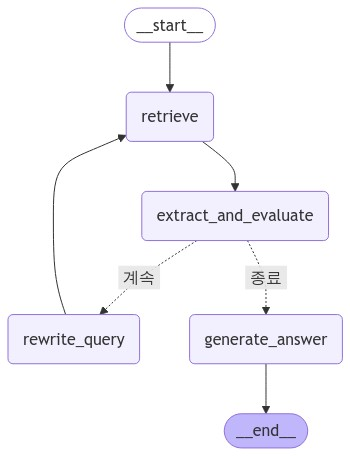

In [89]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# 그래프 생성
workflow = StateGraph(PersonalRagState)

# 노드 추가
workflow.add_node("retrieve", retrieve_documents)
workflow.add_node("extract_and_evaluate", extract_and_evaluate_information)
workflow.add_node("rewrite_query", rewrite_query)
workflow.add_node("generate_answer", generate_node_answer)


# 엣지 추가
workflow.add_edge(START, "retrieve")
workflow.add_edge("retrieve", "extract_and_evaluate")

# 조건부 엣지 추가
workflow.add_conditional_edges(
    "extract_and_evaluate",
    should_continue,
    {
        "계속": "rewrite_query",
        "종료": "generate_answer"
    }
)
workflow.add_edge("rewrite_query", "retrieve")
workflow.add_edge("generate_answer", END)

# 그래프 컴파일
personal_law_agent = workflow.compile()

# 그래프 시각화
display(Image(personal_law_agent.get_graph().draw_mermaid_png()))

Adding a node to a graph that has already been compiled. This will not be reflected in the compiled graph.


ValueError: Node `generate_answer` already present.

In [ ]:
inputs = {"question": "회사에 자기매매로 모회사의 지분을 취득해도 되는가?"}
for output in personal_law_agent.stream(inputs):
    for key, value in output.items():
        # 노드 출력
        pprint(f"Node '{key}':")
        pprint(f"Value: {value}", indent=2, width=80, depth=None)
    print("\n----------------------------------------------------------\n")
    print(value['node_answer'])



---문서 검색---


In [90]:
print(value)

{'documents': [Document(metadata={'chapter': '제4장 영업행위 규칙\n         제1절 공통 영업행위 규칙\n           제1관 신의성실의무 등', 'name': '자본시장법', 'source': '/Users/hyuneui/Desktop/upstage/cookbook/data/자본시장과 금융투자업에 관한 법률(법률)(제20305호)(20240814).pdf'}, page_content='[법률정보]\n다음 조항은 자본시장법 제4장 영업행위 규칙\n         제1절 공통 영업행위 규칙\n           제1관 신의성실의무 등에서 발췌한 내용입니다.\n\n[법률조항]\n제69조(자기주식의 예외적 취득) 투자매매업자는 투자자로부터 그 투자매매업자가 발행한 자기주식으로서 증권시장\n(다자간매매체결회사에서의 거래를 포함한다. 이하 이 조에서 같다)의 매매 수량단위 미만의 주식에 대하여 매도의\n청약을 받은 경우에는 이를 증권시장 밖에서 취득할 수 있다. 이 경우 취득한 자기주식은 대통령령으로 정하는 기간\n이내에 처분하여야 한다. <개정 2013. 5. 28.>'), Document(metadata={'chapter': '제3장 건전경영 유지\n         제1절 경영건전성 감독', 'name': '자본시장법', 'source': '/Users/hyuneui/Desktop/upstage/cookbook/data/자본시장과 금융투자업에 관한 법률(법률)(제20305호)(20240814).pdf'}, page_content='[법률정보]\n다음 조항은 자본시장법 제3장 건전경영 유지\n         제1절 경영건전성 감독에서 발췌한 내용입니다.\n\n[법률조항]\n제34조(대주주와의 거래 등의 제한) ① 금융투자업자(겸영금융투자업자는 제외한다. 이하 이 절에서 같다)는 다음 각 호\n의 어느 하나에 해당하는 행위를 하여서는 아니 된다. 다만, 담보권의 실행 등 권리행사에 필요한 경우, 제176조

`(2) 근로기준법 RAG 에이전트`

모듈별로 프롬프트달리하는거 필요

In [ ]:
# 근로기준법
class LaborRagState(CorrectiveRagState):
    rewritten_query: str   # 재작성한 질문 
    extracted_info: Optional[ExtractedInformation]   # 추출된 정보 조각 
    node_answer: Optional[str]

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from typing import Literal

def retrieve_documents(state: LaborRagState) -> LaborRagState:
    print("---문서 검색---")
    query = state.get("rewritten_query", state["question"])
    docs = labor_law_search.invoke(query)
    return {"documents": docs}

def extract_and_evaluate_information(state: LaborRagState) -> LaborRagState:
    print("---정보 추출 및 평가---")
    extracted_strips = []

    for doc in state["documents"]:
        extract_prompt = ChatPromptTemplate.from_messages([
            ("system", """당신은 근로기준법 전문가입니다. 주어진 문서에서 질문과 관련된 주요 사실과 정보를 3~5개 정도 추출하세요. 
            각 추출된 정보에 대해 다음 두 가지 측면을 0에서 1 사이의 점수로 평가하세요:
            1. 질문과의 관련성
            2. 답변의 충실성 (질문에 대한 완전하고 정확한 답변을 제공할 수 있는 정도)
            
            추출 형식:
            1. [추출된 정보]
            - 관련성 점수: [0-1 사이의 점수]
            - 충실성 점수: [0-1 사이의 점수]
            2. [추출된 정보]
            - 관련성 점수: [0-1 사이의 점수]
            - 충실성 점수: [0-1 사이의 점수]
            ...
            
            마지막으로, 추출된 정보를 종합하여 질문에 대한 전반적인 답변 가능성을 0에서 1 사이의 점수로 평가하세요."""),
            ("human", "[질문]\n{question}\n\n[문서 내용]\n{document_content}")
        ])

        extract_llm = llm.with_structured_output(ExtractedInformation)

        extracted_data = extract_llm.invoke(extract_prompt.format(
            question=state["question"],
            document_content=doc.page_content
        ))

        if extracted_data.query_relevance < 0.8:
            continue

        for strip in extracted_data.strips:
            if strip.relevance_score > 0.7 and strip.faithfulness_score > 0.7:
                extracted_strips.append(strip)

    return {
        "extracted_info": extracted_strips,
        "num_generations": state.get("num_generations", 0) + 1
    }

def rewrite_query(state: LaborRagState) -> LaborRagState:
    print("---쿼리 재작성---")

    rewrite_prompt = ChatPromptTemplate.from_messages([
        ("system", """당신은 근로기준법 전문가입니다. 주어진 원래 질문과 추출된 정보를 바탕으로, 더 관련성 있고 충실한 정보를 찾기 위해 검색 쿼리를 개선해주세요.

        다음 사항을 고려하여 검색 쿼리를 개선하세요:
        1. 원래 질문의 핵심 요소
        2. 추출된 정보의 관련성 점수
        3. 추출된 정보의 충실성 점수
        4. 부족한 정보나 더 자세히 알아야 할 부분

        개선된 검색 쿼리 작성 단계:
        1. 2-3개의 검색 쿼리를 제안하세요.
        2. 각 쿼리는 구체적이고 간결해야 합니다(5-10 단어 사이).
        3. 근로기준법과 관련된 전문 용어를 적절히 활용하세요.
        4. 각 쿼리 뒤에는 해당 쿼리를 제안한 이유를 간단히 설명하세요.

        출력 형식:
        1. [개선된 검색 쿼리 1]
        - 이유: [이 쿼리를 제안한 이유 설명]
        2. [개선된 검색 쿼리 2]
        - 이유: [이 쿼리를 제안한 이유 설명]
        3. [개선된 검색 쿼리 3]
        - 이유: [이 쿼리를 제안한 이유 설명]

        마지막으로, 제안된 쿼리 중 가장 효과적일 것 같은 쿼리를 선택하고 그 이유를 설명하세요."""),
        ("human", "원래 질문: {question}\n\n추출된 정보:\n{extracted_info}\n\n위 지침에 따라 개선된 검색 쿼리를 작성해주세요.")
    ])

    extracted_info_str = "\n".join([strip.content for strip in state["extracted_info"]])
    
    rewrite_llm = llm.with_structured_output(RefinedQuestion)

    response = rewrite_llm.invoke(rewrite_prompt.format(
        question=state["question"],
        extracted_info=extracted_info_str
    ))
    
    return {"rewritten_query": response.question_refined}

def generate_node_answer(state: LaborRagState) -> LaborRagState:
    print("---답변 생성---")

    answer_prompt = ChatPromptTemplate.from_messages([
        ("system", """당신은 근로기준법 전문가입니다. 주어진 질문과 추출된 정보를 바탕으로 답변을 생성해주세요. 
        답변은 마크다운 형식으로 작성하며, 각 정보의 출처를 명확히 표시해야 합니다. 
        답변 구조:
        1. 질문에 대한 직접적인 답변
        2. 관련 법률 조항 및 해석
        3. 추가 설명 또는 예시 (필요한 경우)
        4. 결론 및 요약
        각 섹션에서 사용된 정보의 출처를 괄호 안에 명시하세요. 예: (출처: 근로기준법 제15조)"""),
        ("human", "질문: {question}\n\n추출된 정보:\n{extracted_info}\n\n위 지침에 따라 최종 답변을 작성해주세요.")
    ])

    extracted_info_str = "\n".join([f"내용: {strip.content}\n출처: {strip.source}\n관련성: {strip.relevance_score}\n충실성: {strip.faithfulness_score}" for strip in state["extracted_info"]])

    node_answer = llm.invoke(answer_prompt.format(
        question=state["question"],
        extracted_info=extracted_info_str
    ))

    return {"node_answer": node_answer.content}

def should_continue(state: LaborRagState) -> Literal["계속", "종료"]:
    if state["num_generations"] >= 2:
        return "종료"
    if len(state["extracted_info"]) >= 1:
        return "종료"
    return "계속"

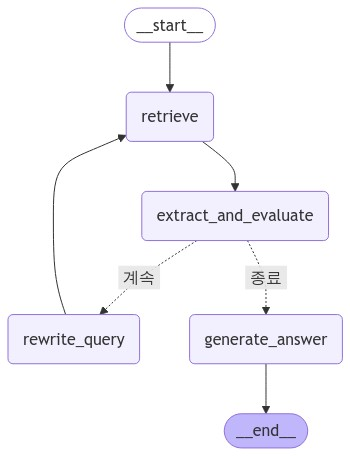

In [ ]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# 그래프 생성
workflow = StateGraph(LaborRagState)

# 노드 추가
workflow.add_node("retrieve", retrieve_documents)
workflow.add_node("extract_and_evaluate", extract_and_evaluate_information)
workflow.add_node("rewrite_query", rewrite_query)
workflow.add_node("generate_answer", generate_node_answer)


# 엣지 추가
workflow.add_edge(START, "retrieve")
workflow.add_edge("retrieve", "extract_and_evaluate")

# 조건부 엣지 추가
workflow.add_conditional_edges(
    "extract_and_evaluate",
    should_continue,
    {
        "계속": "rewrite_query",
        "종료": "generate_answer"
    }
)
workflow.add_edge("rewrite_query", "retrieve")
workflow.add_edge("generate_answer", END)

# 그래프 컴파일
labor_law_agent = workflow.compile()

# 그래프 시각화
display(Image(labor_law_agent.get_graph().draw_mermaid_png()))

In [ ]:
inputs = {"question": "첫 출근 이전에도 해고를 시킬 수 있나요?  회사가 어려워져 채용 내정자를 채용하지 못할 것 같습니다."}
for output in labor_law_agent.stream(inputs):
    for key, value in output.items():
        # 노드 출력
        pprint(f"Node '{key}':")
        pprint(f"Value: {value}", indent=2, width=80, depth=None)
    print("\n----------------------------------------------------------\n")

---문서 검색---
"Node 'retrieve':"
("Value: {'documents': [Document(metadata={'chapter': '제10장 기숙사', 'name': "
 "'근로기준법', 'source': 'data/근로기준법(법률)(제18176호)(20211119).pdf'}, "
 "page_content='[법률정보]\\n다음 조항은 근로기준법 제10장 기숙사에서 발췌한 "
 '내용입니다.\\n\\n[법률조항]\\n제98조(기숙사 생활의 보장) ① 사용자는 사업 또는 사업장의 부속 기숙사에 기숙하는 근로자의 '
 "사생활의 자유를 침해\\n하지 못한다.\\n② 사용자는 기숙사 생활의 자치에 필요한 임원 선거에 간섭하지 못한다.'), "
 "Document(metadata={'chapter': '제10장 기숙사', 'name': '근로기준법', 'source': "
 "'data/근로기준법(법률)(제18176호)(20211119).pdf'}, page_content='[법률정보]\\n다음 조항은 "
 '근로기준법 제10장 기숙사에서 발췌한 내용입니다.\\n\\n[법률조항]\\n제98조(기숙사 생활의 보장) ① 사용자는 사업 '
 '또는 사업장의 부속 기숙사에 기숙하는 근로자의 사생활의 자유를 침해\\n하지 못한다.\\n② 사용자는 기숙사 생활의 자치에 필요한 임원 '
 "선거에 간섭하지 못한다.'), Document(metadata={'chapter': '제10장 기숙사', 'name': "
 "'근로기준법', 'source': 'data/근로기준법(법률)(제18176호)(20211119).pdf'}, "
 "page_content='[법률정보]\\n다음 조항은 근로기준법 제10장 기숙사에서 발췌한 "
 '내용입니다.\\n\\n[법률조항]\\n제98조(기숙사 생활의 보장) ① 사용자는 사업 또는 사업장의 부속 기숙사에 기숙하는 근로자의 '
 "사생활

In [ ]:
print(value['node_answer'])

# 첫 출근 이전 해고 가능성에 대한 답변

1. **질문에 대한 직접적인 답변**
   첫 출근 이전에도 해고가 가능합니다. 그러나 이 경우에도 해고 사유와 절차가 적법해야 하며, 채용 내정자에게 불이익을 주지 않도록 주의해야 합니다.

2. **관련 법률 조항 및 해석**
   근로기준법 제23조에 따르면, 근로계약은 근로자가 근로를 제공하기로 약정한 경우에 성립합니다. 따라서 첫 출근 이전에는 근로계약이 체결되지 않았다고 볼 수 있으며, 이 경우 해고가 가능하다고 해석됩니다. 그러나 해고 사유가 정당해야 하며, 부당한 해고는 법적으로 문제가 될 수 있습니다 (출처: 근로기준법 제23조).

3. **추가 설명 또는 예시**
   예를 들어, 회사가 경영상의 이유로 인해 채용 내정자를 해고하는 경우, 해당 사유가 객관적으로 정당해야 합니다. 만약 회사가 재정적으로 어려운 상황에 처해 있다면, 이를 해고 사유로 삼을 수 있습니다. 그러나 이 경우에도 채용 내정자에게 사전 통지 및 설명을 제공하는 것이 바람직합니다.

4. **결론 및 요약**
   첫 출근 이전에도 해고는 가능하지만, 해고 사유가 정당해야 하며, 근로계약이 체결되지 않은 상태에서의 해고는 법적으로 문제가 될 수 있습니다. 따라서 회사는 해고 결정을 내리기 전에 신중하게 고려해야 합니다 (출처: 근로기준법 제23조).


`(3) 산업안전보건법 RAG 에이전트`

In [ ]:
# 산업안전보건법 
class OSHCRagState(CorrectiveRagState):
    rewritten_query: str   # 재작성한 질문 
    extracted_info: Optional[ExtractedInformation]   # 추출된 정보 조각 
    node_answer: Optional[str] 

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from typing import Literal

def retrieve_documents(state: OSHCRagState) -> OSHCRagState:
    print("---문서 검색---")
    query = state.get("rewritten_query", state["question"])
    docs = oshc_law_search.invoke(query)
    return {"documents": docs}

def extract_and_evaluate_information(state: OSHCRagState) -> OSHCRagState:
    print("---정보 추출 및 평가---")
    extracted_strips = []

    for doc in state["documents"]:
        extract_prompt = ChatPromptTemplate.from_messages([
            ("system", """당신은 산업안전보건법  전문가입니다. 주어진 문서에서 질문과 관련된 주요 사실과 정보를 3~5개 정도 추출하세요. 
            각 추출된 정보에 대해 다음 두 가지 측면을 0에서 1 사이의 점수로 평가하세요:
            1. 질문과의 관련성
            2. 답변의 충실성 (질문에 대한 완전하고 정확한 답변을 제공할 수 있는 정도)
            
            추출 형식:
            1. [추출된 정보]
            - 관련성 점수: [0-1 사이의 점수]
            - 충실성 점수: [0-1 사이의 점수]
            2. [추출된 정보]
            - 관련성 점수: [0-1 사이의 점수]
            - 충실성 점수: [0-1 사이의 점수]
            ...
            
            마지막으로, 추출된 정보를 종합하여 질문에 대한 전반적인 답변 가능성을 0에서 1 사이의 점수로 평가하세요."""),
            ("human", "[질문]\n{question}\n\n[문서 내용]\n{document_content}")
        ])

        extract_llm = llm.with_structured_output(ExtractedInformation)

        extracted_data = extract_llm.invoke(extract_prompt.format(
            question=state["question"],
            document_content=doc.page_content
        ))

        if extracted_data.query_relevance < 0.8:
            continue

        for strip in extracted_data.strips:
            if strip.relevance_score > 0.7 and strip.faithfulness_score > 0.7:
                extracted_strips.append(strip)

    return {
        "extracted_info": extracted_strips,
        "num_generations": state.get("num_generations", 0) + 1
    }

def rewrite_query(state: OSHCRagState) -> OSHCRagState:
    print("---쿼리 재작성---")

    rewrite_prompt = ChatPromptTemplate.from_messages([
        ("system", """당신은 산업안전보건법 전문가입니다. 주어진 원래 질문과 추출된 정보를 바탕으로, 더 관련성 있고 충실한 정보를 찾기 위해 검색 쿼리를 개선해주세요.

        다음 사항을 고려하여 검색 쿼리를 개선하세요:
        1. 원래 질문의 핵심 요소
        2. 추출된 정보의 관련성 점수
        3. 추출된 정보의 충실성 점수
        4. 부족한 정보나 더 자세히 알아야 할 부분

        개선된 검색 쿼리 작성 단계:
        1. 2-3개의 검색 쿼리를 제안하세요.
        2. 각 쿼리는 구체적이고 간결해야 합니다(5-10 단어 사이).
        3. 주택임대차보호법과 관련된 전문 용어를 적절히 활용하세요.
        4. 각 쿼리 뒤에는 해당 쿼리를 제안한 이유를 간단히 설명하세요.

        출력 형식:
        1. [개선된 검색 쿼리 1]
        - 이유: [이 쿼리를 제안한 이유 설명]
        2. [개선된 검색 쿼리 2]
        - 이유: [이 쿼리를 제안한 이유 설명]
        3. [개선된 검색 쿼리 3]
        - 이유: [이 쿼리를 제안한 이유 설명]

        마지막으로, 제안된 쿼리 중 가장 효과적일 것 같은 쿼리를 선택하고 그 이유를 설명하세요."""),
        ("human", "원래 질문: {question}\n\n추출된 정보:\n{extracted_info}\n\n위 지침에 따라 개선된 검색 쿼리를 작성해주세요.")
    ])

    extracted_info_str = "\n".join([strip.content for strip in state["extracted_info"]])
    
    rewrite_llm = llm.with_structured_output(RefinedQuestion)

    response = rewrite_llm.invoke(rewrite_prompt.format(
        question=state["question"],
        extracted_info=extracted_info_str
    ))
    
    return {"rewritten_query": response.question_refined}

def generate_node_answer(state: OSHCRagState) -> OSHCRagState:
    print("---답변 생성---")

    answer_prompt = ChatPromptTemplate.from_messages([
        ("system", """당신은 산업안전보건법 전문가입니다. 주어진 질문과 추출된 정보를 바탕으로 답변을 생성해주세요. 
        답변은 마크다운 형식으로 작성하며, 각 정보의 출처를 명확히 표시해야 합니다. 
        답변 구조:
        1. 질문에 대한 직접적인 답변
        2. 관련 법률 조항 및 해석
        3. 추가 설명 또는 예시 (필요한 경우)
        4. 결론 및 요약
        각 섹션에서 사용된 정보의 출처를 괄호 안에 명시하세요. 예: (출처: 산업안전보건법  제15조)"""),
        ("human", "질문: {question}\n\n추출된 정보:\n{extracted_info}\n\n위 지침에 따라 최종 답변을 작성해주세요.")
    ])

    extracted_info_str = "\n".join([f"내용: {strip.content}\n출처: {strip.source}\n관련성: {strip.relevance_score}\n충실성: {strip.faithfulness_score}" for strip in state["extracted_info"]])

    node_answer = llm.invoke(answer_prompt.format(
        question=state["question"],
        extracted_info=extracted_info_str
    ))

    return {"node_answer": node_answer.content}

def should_continue(state: OSHCRagState) -> Literal["계속", "종료"]:
    if state["num_generations"] >= 2:
        return "종료"
    if len(state["extracted_info"]) >= 1:
        return "종료"
    return "계속"

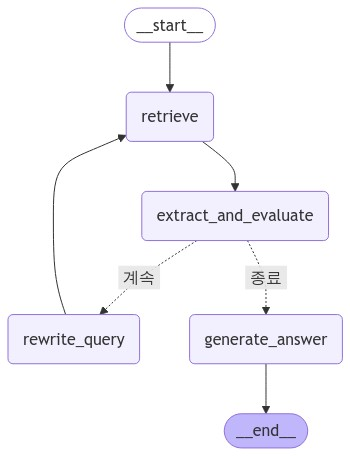

In [ ]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# 그래프 생성
workflow = StateGraph(OSHCRagState)

# 노드 추가
workflow.add_node("retrieve", retrieve_documents)
workflow.add_node("extract_and_evaluate", extract_and_evaluate_information)
workflow.add_node("rewrite_query", rewrite_query)
workflow.add_node("generate_answer", generate_node_answer)


# 엣지 추가
workflow.add_edge(START, "retrieve")
workflow.add_edge("retrieve", "extract_and_evaluate")

# 조건부 엣지 추가
workflow.add_conditional_edges(
    "extract_and_evaluate",
    should_continue,
    {
        "계속": "rewrite_query",
        "종료": "generate_answer"
    }
)
workflow.add_edge("rewrite_query", "retrieve")
workflow.add_edge("generate_answer", END)

# 그래프 컴파일
oshc_law_agent = workflow.compile()

# 그래프 시각화
display(Image(oshc_law_agent.get_graph().draw_mermaid_png()))

In [ ]:
inputs = {"question": "출근시 교통사고로 산재처리를 했는데, 산업재해조사표를 제출해야하나요?"}
for output in oshc_law_agent.stream(inputs):
    for key, value in output.items():
        # 노드 출력
        pprint(f"Node '{key}':")
        pprint(f"Value: {value}", indent=2, width=80, depth=None)
    print("\n----------------------------------------------------------\n")

---문서 검색---
"Node 'retrieve':"
("Value: {'documents': [Document(metadata={'chapter': '제4장 유해ㆍ위험 방지 조치', "
 "'name': '산업안전보건법', 'source': 'data/산업안전보건법(법률)(제19591호)(20240517).pdf'}, "
 "page_content='[법률정보]\\n다음 조항은 산업안전보건법 제4장 유해ㆍ위험 방지 조치에서 발췌한 "
 '내용입니다.\\n\\n[법률조항]\\n제57조(산업재해 발생 은폐 금지 및 보고 등) ① 사업주는 산업재해가 발생하였을 때에는 그 발생 '
 '사실을 은폐해서는\\n아니 된다.\\n② 사업주는 고용노동부령으로 정하는 바에 따라 산업재해의 발생 원인 등을 기록하여 보존하여야 '
 '한다.\\n③ 사업주는 고용노동부령으로 정하는 산업재해에 대해서는 그 발생 개요ㆍ원인 및 보고 시기, 재발방지 계획 '
 "등을\\n고용노동부령으로 정하는 바에 따라 고용노동부장관에게 보고하여야 한다.'), Document(metadata={'chapter': "
 "'제4장 유해ㆍ위험 방지 조치', 'name': '산업안전보건법', 'source': "
 "'data/산업안전보건법(법률)(제19591호)(20240517).pdf'}, page_content='[법률정보]\\n다음 조항은 "
 '산업안전보건법 제4장 유해ㆍ위험 방지 조치에서 발췌한 내용입니다.\\n\\n[법률조항]\\n제57조(산업재해 발생 은폐 금지 및 보고 '
 '등) ① 사업주는 산업재해가 발생하였을 때에는 그 발생 사실을 은폐해서는\\n아니 된다.\\n② 사업주는 고용노동부령으로 정하는 바에 '
 '따라 산업재해의 발생 원인 등을 기록하여 보존하여야 한다.\\n③ 사업주는 고용노동부령으로 정하는 산업재해에 대해서는 그 발생 개요ㆍ원인 '
 "및 보고 시기, 재발방지 계획 등을\\n고용노동부령으로 정하는 바에 따라 고용노동부장관에게 보고하여야 한다.'), "
 "Documen

In [ ]:
print(value['node_answer'])

# 출근 시 교통사고로 인한 산재처리와 산업재해조사표 제출 여부

## 1. 질문에 대한 직접적인 답변
출근 시 발생한 교통사고로 인해 산재처리를 하였다면, 산업재해조사표를 제출해야 합니다. 사업주는 해당 사고에 대한 발생 개요와 원인 등을 기록하고, 이를 고용노동부장관에게 보고해야 할 의무가 있습니다.

## 2. 관련 법률 조항 및 해석
- **산업안전보건법 제57조 ②항**: "사업주는 고용노동부령으로 정하는 바에 따라 산업재해의 발생 원인 등을 기록하여 보존하여야 한다."
- **산업안전보건법 제57조 ③항**: "사업주는 고용노동부령으로 정하는 산업재해에 대해서는 그 발생 개요ㆍ원인 및 보고 시기, 재발방지 계획 등을 고용노동부령으로 정하는 바에 따라 고용노동부장관에게 보고하여야 한다."

이 조항들은 사업주가 산업재해 발생 시 그 원인과 경과를 기록하고, 이를 관련 기관에 보고할 의무가 있음을 명시하고 있습니다.

## 3. 추가 설명 또는 예시
산업재해조사표는 사고의 발생 원인, 경과, 재발 방지 대책 등을 포함하여 작성해야 하며, 이는 고용노동부의 지침에 따라 이루어져야 합니다. 예를 들어, 출근길에 발생한 교통사고의 경우, 사고의 경위와 원인, 그리고 향후 유사 사고를 방지하기 위한 대책을 포함하여 보고해야 합니다.

## 4. 결론 및 요약
출근 시 발생한 교통사고로 산재처리를 한 경우, 사업주는 산업재해조사표를 작성하여 고용노동부장관에게 제출해야 합니다. 이는 법적으로 요구되는 의무이며, 사고의 원인과 재발 방지 대책을 포함해야 합니다. 따라서, 관련 법률을 준수하여 적절한 절차를 이행하는 것이 중요합니다. (출처: 산업안전보건법 제57조)


*산업안전보건법 + 산업재해보상보험법은 보통 같이 참조하여 가지고 오므로 두개를 같은 노드에 넣어도 될듯

`(4) 웹 검색 기반 RAG 에이전트`

In [ ]:
# 웹 검색 도구 
class SearchRagState(CorrectiveRagState):
    rewritten_query: str   # 재작성한 질문 
    extracted_info: Optional[ExtractedInformation]   # 추출된 정보 조각 
    node_answer: Optional[str] 

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from typing import Literal

def retrieve_documents(state: SearchRagState) -> SearchRagState:
    print("---문서 검색---")
    query = state.get("rewritten_query", state["question"])
    docs = web_search.invoke(query)
    return {"documents": docs}

def extract_and_evaluate_information(state: SearchRagState) -> SearchRagState:
    print("---정보 추출 및 평가---")
    extracted_strips = []

    for doc in state["documents"]:
        extract_prompt = ChatPromptTemplate.from_messages([
            ("system", """당신은 인터넷 정보 검색 전문가입니다. 주어진 문서에서 질문과 관련된 주요 사실과 정보를 3~5개 정도 추출하세요. 
            각 추출된 정보에 대해 다음 두 가지 측면을 0에서 1 사이의 점수로 평가하세요:
            1. 질문과의 관련성
            2. 답변의 충실성 (질문에 대한 완전하고 정확한 답변을 제공할 수 있는 정도)
            
            추출 형식:
            1. [추출된 정보]
            - 관련성 점수: [0-1 사이의 점수]
            - 충실성 점수: [0-1 사이의 점수]
            2. [추출된 정보]
            - 관련성 점수: [0-1 사이의 점수]
            - 충실성 점수: [0-1 사이의 점수]
            ...
            
            마지막으로, 추출된 정보를 종합하여 질문에 대한 전반적인 답변 가능성을 0에서 1 사이의 점수로 평가하세요."""),
            ("human", "[질문]\n{question}\n\n[문서 내용]\n{document_content}")
        ])

        extract_llm = llm.with_structured_output(ExtractedInformation)

        extracted_data = extract_llm.invoke(extract_prompt.format(
            question=state["question"],
            document_content=doc.page_content
        ))

        if extracted_data.query_relevance < 0.8:
            continue

        for strip in extracted_data.strips:
            if strip.relevance_score > 0.7 and strip.faithfulness_score > 0.7:
                extracted_strips.append(strip)

    return {
        "extracted_info": extracted_strips,
        "num_generations": state.get("num_generations", 0) + 1
    }

def rewrite_query(state: SearchRagState) -> SearchRagState:
    print("---쿼리 재작성---")

    rewrite_prompt = ChatPromptTemplate.from_messages([
        ("system", """당신은 인터넷 정보 검색 전문가입니다. 주어진 원래 질문과 추출된 정보를 바탕으로, 더 관련성 있고 충실한 정보를 찾기 위해 검색 쿼리를 개선해주세요.

        다음 사항을 고려하여 검색 쿼리를 개선하세요:
        1. 원래 질문의 핵심 요소
        2. 추출된 정보의 관련성 점수
        3. 추출된 정보의 충실성 점수
        4. 부족한 정보나 더 자세히 알아야 할 부분

        개선된 검색 쿼리 작성 단계:
        1. 2-3개의 검색 쿼리를 제안하세요.
        2. 각 쿼리는 구체적이고 간결해야 합니다(5-10 단어 사이).
        3. 질문과 관련된 전문 용어를 적절히 활용하세요.
        4. 각 쿼리 뒤에는 해당 쿼리를 제안한 이유를 간단히 설명하세요.

        출력 형식:
        1. [개선된 검색 쿼리 1]
        - 이유: [이 쿼리를 제안한 이유 설명]
        2. [개선된 검색 쿼리 2]
        - 이유: [이 쿼리를 제안한 이유 설명]
        3. [개선된 검색 쿼리 3]
        - 이유: [이 쿼리를 제안한 이유 설명]

        마지막으로, 제안된 쿼리 중 가장 효과적일 것 같은 쿼리를 선택하고 그 이유를 설명하세요."""),
        ("human", "원래 질문: {question}\n\n추출된 정보:\n{extracted_info}\n\n위 지침에 따라 개선된 검색 쿼리를 작성해주세요.")
    ])

    extracted_info_str = "\n".join([strip.content for strip in state["extracted_info"]])
    
    rewrite_llm = llm.with_structured_output(RefinedQuestion)

    response = rewrite_llm.invoke(rewrite_prompt.format(
        question=state["question"],
        extracted_info=extracted_info_str
    ))
    
    return {"rewritten_query": response.question_refined}

def generate_node_answer(state: SearchRagState) -> SearchRagState:
    print("---답변 생성---")

    answer_prompt = ChatPromptTemplate.from_messages([
        ("system", """당신은 인터넷 정보 검색 전문가입니다. 주어진 질문과 추출된 정보를 바탕으로 답변을 생성해주세요. 
        답변은 마크다운 형식으로 작성하며, 각 정보의 출처를 명확히 표시해야 합니다. 
        답변 구조:
        1. 질문에 대한 직접적인 답변
        2. 관련 출처 및 링크
        3. 추가 설명 또는 예시 (필요한 경우)
        4. 결론 및 요약
        각 섹션에서 사용된 정보의 출처를 괄호 안에 명시하세요. 국가법령정보 사이트나 공신력있는 사이트에서만 가져오세요. 블로그제외 예: (출처: 국가법령정보 (https://www.law.go.kr/)"""),
        ("human", "질문: {question}\n\n추출된 정보:\n{extracted_info}\n\n위 지침에 따라 최종 답변을 작성해주세요.")
    ])

    extracted_info_str = "\n".join([f"내용: {strip.content}\n출처: {strip.source}\n관련성: {strip.relevance_score}\n충실성: {strip.faithfulness_score}" for strip in state["extracted_info"]])

    node_answer = llm.invoke(answer_prompt.format(
        question=state["question"],
        extracted_info=extracted_info_str
    ))

    return {"node_answer": node_answer.content}

def should_continue(state: SearchRagState) -> Literal["계속", "종료"]:
    if state["num_generations"] >= 2:
        return "종료"
    if len(state["extracted_info"]) >= 1:
        return "종료"
    return "계속"

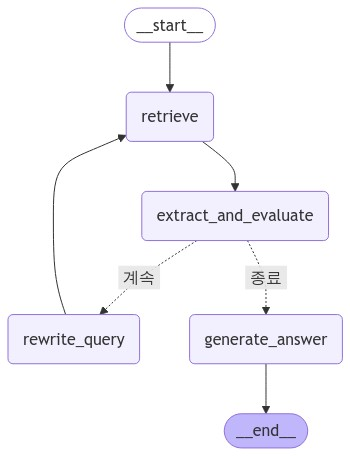

In [ ]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# 그래프 생성
workflow = StateGraph(SearchRagState)

# 노드 추가
workflow.add_node("retrieve", retrieve_documents)
workflow.add_node("extract_and_evaluate", extract_and_evaluate_information)
workflow.add_node("rewrite_query", rewrite_query)
workflow.add_node("generate_answer", generate_node_answer)


# 엣지 추가
workflow.add_edge(START, "retrieve")
workflow.add_edge("retrieve", "extract_and_evaluate")

# 조건부 엣지 추가
workflow.add_conditional_edges(
    "extract_and_evaluate",
    should_continue,
    {
        "계속": "rewrite_query",
        "종료": "generate_answer"
    }
)
workflow.add_edge("rewrite_query", "retrieve")
workflow.add_edge("generate_answer", END)

# 그래프 컴파일
search_web_agent = workflow.compile()
print(search_web_agent)

# 그래프 시각화
display(Image(search_web_agent.get_graph().draw_mermaid_png()))

In [ ]:
inputs = {"question": "출근시 교통사고로 산재처리를 했는데, 산업재해조사표를 제출해야하나요?"}
for output in search_web_agent.stream(inputs):
    for key, value in output.items():
        # 노드 출력
        pprint(f"Node '{key}':")
        pprint(f"Value: {value}", indent=2, width=80, depth=None)
    print("\n----------------------------------------------------------\n")

---문서 검색---
"Node 'retrieve':"
("Value: {'documents': [Document(metadata={'source': 'web search', 'url': "
 "'https://blog.naver.com/PostView.nhn?blogId=hope-pys&logNo=222687929063'}, "
 "page_content='<Document "
 'href="https://blog.naver.com/PostView.nhn?blogId=hope-pys&logNo=222687929063"/>\\n출퇴근 '
 '교통사고, 산업재해조사표 제출 여부 , 제출 의무 : 네이버 블로그 NAVER 블로그 블로그 검색 블로그 주소 변경 불가 안내블로그 마켓 '
 '판매자의 이력 관리를 위해 블로그 주소 변경이 불가합니다. 블로그 아이디가 필요해요!블로그에서 진짜 나를 기록하고 블로그 아이디 만들기 '
 '블로그 아이디 만들기 레이어 닫기 설정한 아이디는 나중에 변경할 수 없으니 신중하게 입력해주세요. 변경 전 공유된 블로그/글/클립 링크는 '
 '연결이 끊길 수 있습니다. 블로그 도움말에서 아이디 변경 유의사항을 확인해보세요. 2. 블로그 아이디는 한번 변경하면 취소 확인 블로그 '
 '아이디는 한번 정하면 취소 확인 블로그 아이디가 만들어졌어요. 나중에 언제든지 변경할 수 있어요. 블로그 주제 주제 없음 블로그 시작하기 '
 '내 블로그  블로그 홈  프로필 사진 변경 블로그 전체 서비스 보기 네이버 주요 서비스 바로가기 설정전체 서비스 보기 네이버 MYBOX '
 "블로그 VIBE_New_ 블로그 메뉴 프롤로그 블로그 안부 블로그\\n</Document>'), "
 "Document(metadata={'source': 'web search', 'url': "
 "'https://m.blog.naver.com/laborprofessional/222708939444'}, "
 "page_content='<Document "
 'href="h

In [ ]:
print(value['node_answer'])

## 출근 시 교통사고로 산재처리를 했는데, 산업재해조사표를 제출해야 하나요?

출근 중 발생한 교통사고는 산업재해로 인정될 수 있으며, 이 경우 산업재해조사표를 제출해야 할 의무가 있습니다. 특히, 3일 이상의 휴업이 필요한 산업재해가 발생한 경우에는 사고 발생 후 1개월 이내에 관할 노동청에 산업재해조사표를 제출해야 합니다.

### 관련 출처 및 링크
- 산업안전보건법 제57조 및 동 시행규칙 제73조 (출처: 국가법령정보 (https://www.law.go.kr/))
- 산업재해보상보험법 제175조 (출처: 국가법령정보 (https://www.law.go.kr/))

### 추가 설명
산업재해조사표는 산업재해 발생 시 근로자가 제출해야 하는 서류로, 사고의 경위와 피해 상황을 기록합니다. 사업주가 제공한 교통수단을 통한 출퇴근 중 발생한 재해는 반드시 산업재해조사표 제출 대상이 되며, 사적 교통수단으로 통상적인 경로와 방법으로 출퇴근 중 발생한 재해는 제출 대상이 아닙니다. 또한, 산업재해조사표를 제출하지 않은 경우에는 1,500만원 이하의 과태료가 부과될 수 있습니다.

### 결론 및 요약
출근 시 교통사고로 인해 산업재해 처리를 하였다면, 반드시 산업재해조사표를 제출해야 합니다. 이는 법적으로 요구되는 절차이며, 제출하지 않을 경우 과태료가 부과될 수 있습니다. 따라서 사고 발생 후 신속하게 필요한 서류를 준비하는 것이 중요합니다.


### 4-2. 질문 라우팅 
- 사용자의 질문을 분석하여 적절한 에이전트를 선택 (Adaptive RAG 적용)

In [ ]:
from typing import Annotated
from operator import add

# 메인 그래프 상태 정의
class ResearchAgentState(TypedDict):
    question: str
    answers: Annotated[List[str], add]
    final_answer: str
    datasources: List[str]
    evaluation_report: Optional[dict]
    user_decision: Optional[str]

In [ ]:
from typing import Literal
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field

# 라우팅 결정을 위한 데이터 모델
class ToolSelector(BaseModel):
    """Routes the user question to the most appropriate tool."""
    tool: Literal["search_personal", "search_labor", "search_oshc", "search_web"] = Field(
        description="Select one of the tools, based on the user's question.",
    )

class ToolSelectors(BaseModel):
    """Select the appropriate tools that are suitable for the user question."""
    tools: List[ToolSelector] = Field(
        description="Select one or more tools, based on the user's question.",
    )

# 구조화된 출력을 위한 LLM 설정
structured_llm_tool_selector = llm.with_structured_output(ToolSelectors)

# 라우팅을 위한 프롬프트 템플릿
system = dedent("""You are an AI assistant specializing in routing user questions to the appropriate tools.
Use the following guidelines:
- For questions specifically about legal provisions or articles of the company regulations law (취업규칙), use the search_personal tool.
- For questions specifically about legal provisions or articles of the labor law (근로기준법), use the search_labor tool.
- For questions specifically about legal provisions or articles of the Occupational Safety and Health law (산업안전보건법), use the search_oshc tool.
- For any other information, including questions related to these laws but not directly about specific legal provisions, or for the most up-to-date data, use the search_web tool.
Always choose all of the appropriate tools based on the user's question. 
If a question is about a law but doesn't seem to be asking about specific legal provisions, include both the relevant law search tool and the search_web tool.""")

route_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "{question}"),
    ]
)

# 질문 라우터 정의
question_tool_router = route_prompt | structured_llm_tool_selector

# 테스트 실행
print(question_tool_router.invoke({"question": "취업규칙에서 선택적 근로시간제가 적용가능한 근로자는 누구인가요?"}))
print(question_tool_router.invoke({"question": "첫 출근 이전에도 해고를 시킬 수 있나요?  회사가 어려워져 채용 내정자를 채용하지 못할 것 같습니다"}))
print(question_tool_router.invoke({"question": "출근시 교통사고로 산재처리를 했는데, 산업재해조사표를 제출해야하나요?"}))

tools=[ToolSelector(tool='search_personal')]
tools=[ToolSelector(tool='search_labor'), ToolSelector(tool='search_web')]
tools=[ToolSelector(tool='search_oshc'), ToolSelector(tool='search_web')]


In [ ]:
# 질문 라우팅 노드 
def analyze_question_tool_search(state: ResearchAgentState):
    question = state["question"]
    result = question_tool_router.invoke({"question": question})
    datasources = [tool.tool for tool in result.tools]
    return {"datasources": datasources}


def route_datasources_tool_search(state: ResearchAgentState) -> List[str]:
    datasources = set(state['datasources'])
    valid_sources = {"search_personal", "search_labor", "search_oshc", "search_web"}
    
    if datasources.issubset(valid_sources):
        return list(datasources)
    
    return list(valid_sources)

In [ ]:
# 노드 정의 
def personal_rag_node(state: PersonalRagState, input=ResearchAgentState) -> ResearchAgentState:
    print("--- 사내문서(취업규칙) 전문가 에이전트 시작 ---")
    question = state["question"]
    answer = personal_law_agent.invoke({"question": question})
    return {"answers": [answer["node_answer"]]}

def labor_rag_node(state: LaborRagState, input=ResearchAgentState) -> ResearchAgentState:
    print("--- 근로기준법 전문가 에이전트 시작 ---")
    question = state["question"]
    answer = labor_law_agent.invoke({"question": question})
    return {"answers": [answer["node_answer"]]}

def oshc_rag_node(state: OSHCRagState, input=ResearchAgentState) -> ResearchAgentState:
    print("--- 산업안전보건법 전문가 에이전트 시작 ---")
    question = state["question"]
    answer = oshc_law_agent.invoke({"question": question})
    return {"answers": [answer["node_answer"]]}

def web_rag_node(state: SearchRagState, input=ResearchAgentState) -> ResearchAgentState:
    print("--- 인터넷 검색 전문가 에이전트 시작 ---")
    question = state["question"]
    answer = search_web_agent.invoke({"question": question})
    return {"answers": [answer["node_answer"]]}


In [ ]:
# 최종 답변 생성 노드
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

# RAG 프롬프트 정의
rag_prompt = ChatPromptTemplate.from_messages([
    ("system", """You are an assistant answering questions based on provided documents. Follow these guidelines:

1. Use only information from the given documents.
2. If the document lacks relevant info, say "제공된 정보로는 충분한 답변을 할 수 없습니다."
3. Cite the source of information for each sentence in your answer. Use the following format:
    - For legal articles: "법률명 제X조 Y항"
    - For web sources: "출처 제목 (URL)"
4. Don't speculate or add information not in the documents.
5. Keep answers concise and clear.
6. Omit irrelevant information.
7. If multiple sources provide the same information, cite all relevant sources.
8. If information comes from multiple sources, combine them coherently while citing each source.

Example of citation usage:
'''[근로기준법 제2조 제1항 제1호] 근로자란 직업의 종류와 관계없이 임금을 목적으로 사업이나 사업장에 근로를 제공하는 사람을 말한다

[대법 2009다99396,  선고일자 : 2010-04-15]
근로기준법상 근로자에 해당하는지는 계약의 형식이 고용계약, 도급계약 또는 위임계약인지 여부보다 근로제공 관계의 실질이 근로제공자가 사업 또는 사업장에 임금을 목적으로 종속적인 관계에서 사용자에게 근로를 제공하였는지 여부에 따라 판단하여야 한다.
여기에서 종속적인 관계가 있는지는, 업무 내용을 사용자가 정하고 취업규칙 또는 복무(인사)규정 등의 적용을 받으며 업무수행과정에서 사용자가 상당한 지휘·감독을 하는지  사용자가 근무시간과 근무장소를 지정하고 근로자가 이에 구속을 받는지, (국가법령정보 사이트, https://example.com/realestate) '''
'''
"""
    ),
    ("human", "Answer the following question using these documents:\n\n[Documents]\n{documents}\n\n[Question]\n{question}"),
])

def answer_final(state: ResearchAgentState) -> ResearchAgentState:
    """
    Generate answer using the retrieved_documents
    """
    print("---최종 답변---")
    question = state["question"]
    documents = state.get("answers", [])
    if not isinstance(documents, list):
        documents = [documents]

    # 문서 내용을 문자열로 결합 
    documents_text = "\n\n".join(documents)

    # RAG generation
    rag_chain = rag_prompt | llm | StrOutputParser()
    generation = rag_chain.invoke({"documents": documents_text, "question": question})
    return {"final_answer": generation, "question":question}


# LLM Fallback 프롬프트 정의
fallback_prompt = ChatPromptTemplate.from_messages([
    ("system", """You are an AI assistant helping with various topics. Follow these guidelines:

1. Provide accurate and helpful information to the best of your ability.
2. Express uncertainty when unsure; avoid speculation.
3. Keep answers concise yet informative.
4. Respond ethically and constructively.
5. Mention reliable general sources when applicable."""),
    ("human", "{question}"),
])

def llm_fallback(state: ResearchAgentState) -> ResearchAgentState:
    """
    Generate answer using the LLM without context
    """
    print("---Fallback 답변---")
    question = state["question"]
    
    # LLM chain
    llm_chain = fallback_prompt | llm | StrOutputParser()
    
    generation = llm_chain.invoke({"question": question})
    return {"final_answer": generation, "question":question}

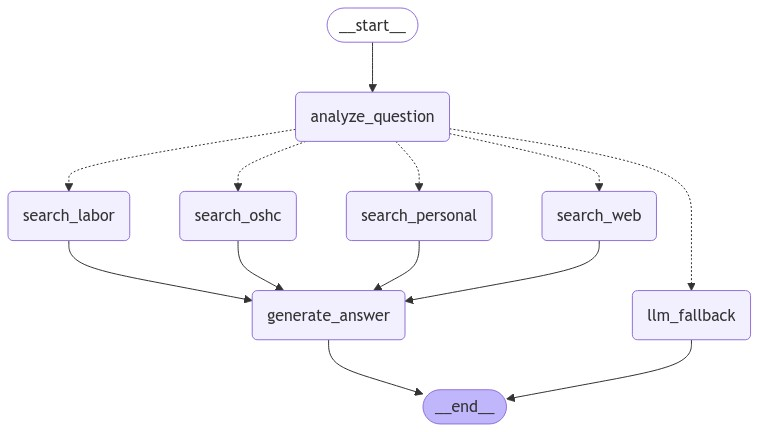

In [ ]:
# 노드 정의를 딕셔너리로 관리
nodes = {
    "analyze_question": analyze_question_tool_search,
    "search_personal": personal_rag_node,
    "search_labor": labor_rag_node,
    "search_oshc": oshc_rag_node,
    "search_web": web_rag_node,
    "generate_answer": answer_final,
    "llm_fallback": llm_fallback
}

# 그래프 생성을 위한 StateGraph 객체를 정의
search_builder = StateGraph(ResearchAgentState)

# 노드 추가
for node_name, node_func in nodes.items():
    search_builder.add_node(node_name, node_func)

# 엣지 추가 (병렬 처리)
search_builder.add_edge(START, "analyze_question")
search_builder.add_conditional_edges(
    "analyze_question",
    route_datasources_tool_search,
    ["search_personal", "search_labor", "search_oshc", "search_web", "llm_fallback"]
)

# 검색 노드들을 generate_answer에 연결
for node in ["search_personal", "search_labor", "search_oshc", "search_web"]:
    search_builder.add_edge(node, "generate_answer")

search_builder.add_edge("generate_answer", END)
search_builder.add_edge("llm_fallback", END)

# 그래프 컴파일
rag_search_graph = search_builder.compile()

# 그래프 시각화 
display(Image(rag_search_graph.get_graph().draw_mermaid_png()))

In [ ]:
inputs = {"question": "출근시 교통사고로 산재처리를 했는데, 산업재해조사표를 제출해야하나요?"}
for output in rag_search_graph.stream(inputs):
    for key, value in output.items():
        # 노드 출력
        pprint(f"Node '{key}':")
        pprint(f"Value: {value}", indent=2, width=80, depth=None)
    print("\n----------------------------------------------------------\n")

"Node 'analyze_question':"
"Value: {'datasources': ['search_oshc', 'search_web']}"

----------------------------------------------------------

--- 산업안전보건법 전문가 에이전트 시작 ---
---문서 검색---
--- 인터넷 검색 전문가 에이전트 시작 ---
---문서 검색---
---정보 추출 및 평가---
---정보 추출 및 평가---
---답변 생성---
"Node 'search_oshc':"
("Value: {'answers': ['# 출근 시 교통사고로 인한 산재처리와 산업재해조사표 제출 여부\\n\\n## 1. 질문에 대한 "
 '직접적인 답변\\n출근 시 발생한 교통사고로 인해 산재처리를 하였다면, 산업재해조사표를 제출해야 합니다. 사업주는 해당 사고에 대한 발생 '
 '개요와 원인 등을 기록하고, 이를 고용노동부장관에게 보고해야 할 의무가 있습니다.\\n\\n## 2. 관련 법률 조항 및 해석\\n- '
 '**산업안전보건법 제57조 ②항**: "사업주는 고용노동부령으로 정하는 바에 따라 산업재해의 발생 원인 등을 기록하여 보존하여야 '
 '한다."\\n- **산업안전보건법 제57조 ③항**: "사업주는 고용노동부령으로 정하는 산업재해에 대해서는 그 발생 개요ㆍ원인 및 보고 '
 '시기, 재발방지 계획 등을 고용노동부령으로 정하는 바에 따라 고용노동부장관에게 보고하여야 한다."\\n\\n이 조항들은 사업주가 산업재해 '
 '발생 시 그 원인과 경과를 기록하고, 이를 관련 기관에 보고할 의무가 있음을 명시하고 있습니다.\\n\\n## 3. 추가 설명 또는 '
 '예시\\n산업재해조사표는 사고의 발생 원인, 경과, 재발 방지 대책 등을 포함해야 하며, 이는 고용노동부의 지침에 따라 작성되어야 '
 '합니다. 예를 들어, 출근길에 발생한 교통사고의 경우, 사고의 경위와 원인, 그리고 향후 유사 사고를 방지하기 위한 대책을 포함하여 '


In [ ]:
print(value['final_answer'])

출근 시 발생한 교통사고로 인해 산재처리를 하였다면, 산업재해조사표를 제출해야 합니다. 사업주는 사고의 발생 개요와 원인 등을 기록하고, 이를 고용노동부장관에게 보고할 의무가 있습니다[산업안전보건법 제57조 ②항, 제57조 ③항]. 산업재해조사표는 사고의 경위와 피해 상황을 기록하는 서류로, 사고 발생 후 3일 이내에 제출해야 합니다[출처: 출퇴근 교통사고, 산업재해조사표 제출 여부 (https://www.law.go.kr/)]. 따라서, 출근 시 교통사고로 산재처리를 했다면 반드시 산업재해조사표를 제출해야 합니다.


# 5. 답변 평가 및 확인

### 5-1. 답변을 평가하는 ReAct 에이전트

In [ ]:
from textwrap import dedent

evaluation_prompt = dedent("""
당신은 AI 어시스턴트가 생성한 답변을 평가하는 전문가입니다. 주어진 질문과 답변을 평가하고, 60점 만점으로 점수를 매기세요. 다음 기준을 사용하여 평가하십시오:

1. 정확성 (10점)
2. 관련성 (10점)
3. 완전성 (10점)
4. 인용 정확성 (10점)
5. 명확성과 간결성 (10점)
6. 객관성 (10점)

평가 과정:
1. 주어진 질문과 답변을 주의 깊게 읽으십시오.
2. 필요한 경우, 다음 도구를 사용하여 추가 정보를 수집하세요:
   - web_search: 웹 검색
   - personal_law_search: 사내문서(취업규칙) 검색
   - labor_law_search: 근로기준법 검색
   - oshc_law_search: 산업안전보건법 검색

   도구 사용 형식:
   Action: [tool_name]
   Action Input: [input for the tool]

3. 각 기준에 대해 1-10점 사이의 점수를 매기세요.
4. 총점을 계산하세요 (60점 만점).

출력 형식:
{
  "scores": {
    "accuracy": 0,
    "relevance": 0,
    "completeness": 0,
    "citation_accuracy": 0,
    "clarity_conciseness": 0,
    "objectivity": 0
  },
  "total_score": 0,
  "brief_evaluation": "간단한 평가 설명"
}

최종 출력에는 각 기준의 점수, 총점, 그리고 간단한 평가 설명만 포함하세요.
""")

In [ ]:
tools

[StructuredTool(name='personal_law_search', description='인사규정 법률 조항을 검색합니다.', args_schema=<class 'langchain_core.utils.pydantic.personal_law_search'>, func=<function personal_law_search at 0x0000018B7D07A160>),
 StructuredTool(name='labor_law_search', description='근로기준법 법률 조항을 검색합니다.', args_schema=<class 'langchain_core.utils.pydantic.labor_law_search'>, func=<function labor_law_search at 0x0000018B7D032160>),
 StructuredTool(name='oshc_law_search', description='산업안전보건법 법률 조항을 검색합니다.', args_schema=<class 'langchain_core.utils.pydantic.oshc_law_search'>, func=<function oshc_law_search at 0x0000018B7D07A840>),
 StructuredTool(name='web_search', description='데이터베이스에 없는 정보 또는 최신 정보를 웹에서 검색합니다.', args_schema=<class 'langchain_core.utils.pydantic.web_search'>, func=<function web_search at 0x0000018B7D07B920>)]

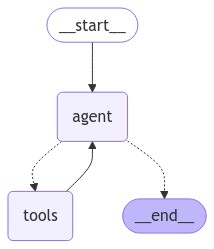

In [ ]:
from langgraph.prebuilt import create_react_agent
from IPython.display import Image, display

# 그래프 생성 
answer_reviewer = create_react_agent(
    llm, 
    tools=tools, 
    state_modifier=evaluation_prompt,
    )

# 그래프 출력
display(Image(answer_reviewer.get_graph().draw_mermaid_png()))

In [ ]:
# 그래프 실행
from langchain_core.messages import HumanMessage

messages = [HumanMessage(content=f"""[질문]\n\{value['question']}n\n[답변]\n{value['final_answer']}""")]
messages = answer_reviewer.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

[질문]
\출근시 교통사고로 산재처리를 했는데, 산업재해조사표를 제출해야하나요?n
[답변]
출근 시 발생한 교통사고로 인해 산재처리를 하였다면, 산업재해조사표를 제출해야 합니다. 사업주는 사고의 발생 개요와 원인 등을 기록하고, 이를 고용노동부장관에게 보고할 의무가 있습니다[산업안전보건법 제57조 ②항, 제57조 ③항]. 산업재해조사표는 사고의 경위와 피해 상황을 기록하는 서류로, 사고 발생 후 3일 이내에 제출해야 합니다[출처: 출퇴근 교통사고, 산업재해조사표 제출 여부 (https://www.law.go.kr/)]. 따라서, 출근 시 교통사고로 산재처리를 했다면 반드시 산업재해조사표를 제출해야 합니다.
================================== Ai Message ==================================
Tool Calls:
  oshc_law_search (call_4HhGdh54S2pGeII5Z2PlaYcJ)
 Call ID: call_4HhGdh54S2pGeII5Z2PlaYcJ
  Args:
    query: 산업재해조사표 제출 의무
  labor_law_search (call_TjDTfGTKY9t2kO8xXw9G3H7i)
 Call ID: call_TjDTfGTKY9t2kO8xXw9G3H7i
  Args:
    query: 출근길 교통사고 산재처리
================================= Tool Message =================================
Name: oshc_law_search

[Document(metadata={'chapter': '제4장 유해ㆍ위험 방지 조치', 'name': '산업안전보건법', 'source': 'data/산업안전보건법(법률)(제19591호)(20240517).pdf'}, page_con

In [ ]:
json.loads(m.content).keys()

dict_keys(['scores', 'total_score', 'brief_evaluation'])

In [ ]:
print(json.loads(m.content)['total_score']) #토탈점수 36점

55


### 5-2. 답변 평가 내용을 확인하는 HITL 추가

In [ ]:
# 답변 평가하는 노드를 추가
def evaluate_answer_node(state:ResearchAgentState):
    question = state["question"]
    final_answer = state["final_answer"]

    messages = [HumanMessage(content=f"""[질문]\n\{question}n\n[답변]\n{final_answer}""")]
    response = answer_reviewer.invoke({"messages": messages})
    response_dict = json.loads(response['messages'][-1].content)

    return {"evaluation_report": response_dict, "question": question, "final_answer": final_answer}

# HITL 조건부 엣지 정의
def human_review(state: ResearchAgentState):
    print("\n현재 답변:")
    print(state['final_answer'])
    print("\n평가 결과:")
    print(f"총점: {state['evaluation_report']['total_score']}/60")
    print(state['evaluation_report']['brief_evaluation'])
    
    user_input = input("\n이 답변을 승인하시겠습니까? (y/n): ").lower()
    
    if user_input == 'y':
        return "approved"
    else:
        return "rejected"
    

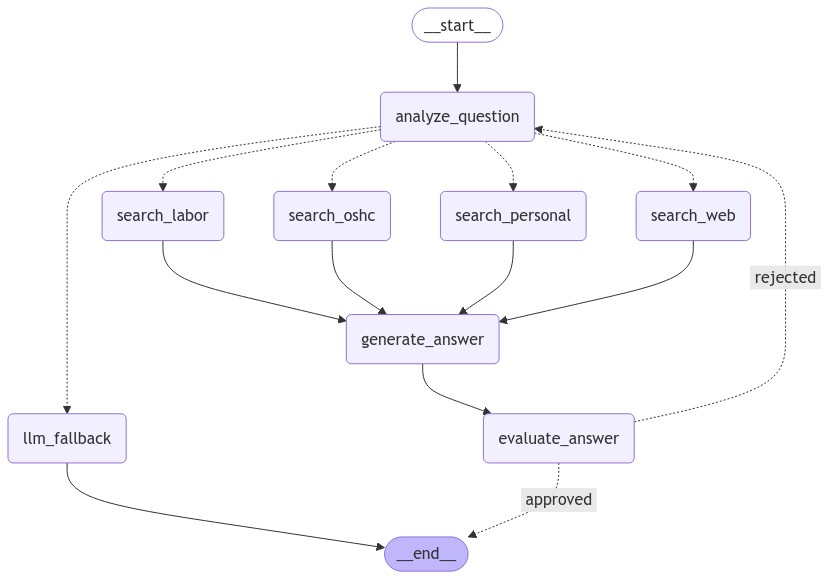

In [ ]:
# 노드 정의를 딕셔너리로 관리
nodes = {
    "analyze_question": analyze_question_tool_search,
    "search_personal": personal_rag_node,
    "search_labor": labor_rag_node,
    "search_oshc": oshc_rag_node,
    "search_web": web_rag_node,
    "generate_answer": answer_final,
    "llm_fallback": llm_fallback,
    "evaluate_answer": evaluate_answer_node, 
}

# 그래프 생성을 위한 StateGraph 객체를 정의
search_builder = StateGraph(ResearchAgentState)

# 노드 추가
for node_name, node_func in nodes.items():
    search_builder.add_node(node_name, node_func)

# 엣지 추가 (병렬 처리)
search_builder.add_edge(START, "analyze_question")
search_builder.add_conditional_edges(
    "analyze_question",
    route_datasources_tool_search,
    ["search_personal", "search_labor", "search_oshc", "search_web", "llm_fallback"]
)

# 검색 노드들을 generate_answer에 연결
for node in ["search_personal", "search_labor", "search_oshc", "search_web"]:
    search_builder.add_edge(node, "generate_answer")

search_builder.add_edge("generate_answer", "evaluate_answer")

# HITL 결과에 따른 조건부 엣지 추가
search_builder.add_conditional_edges(
    "evaluate_answer",
    human_review,
    {
        "approved": END,
        "rejected": "analyze_question"  # 승인되지 않은 경우 질문 분석 단계로 돌아감
    }
)

search_builder.add_edge("llm_fallback", END)

# 그래프 컴파일
legal_rag_agent = search_builder.compile()

# 그래프 시각화 
display(Image(legal_rag_agent.get_graph().draw_mermaid_png()))

In [ ]:
inputs = {"question": "출근시 교통사고로 산재처리를 했는데, 산업재해조사표를 제출해야하나요?"}
for output in legal_rag_agent.stream(inputs):
    for key, value in output.items():
        # 노드 출력
        pprint(f"Node '{key}':")
        pprint(f"Value: {value}", indent=2, width=80, depth=None)
    print("\n----------------------------------------------------------\n")

"Node 'analyze_question':"
"Value: {'datasources': ['search_oshc', 'search_web']}"

----------------------------------------------------------

--- 산업안전보건법 전문가 에이전트 시작 ---
---문서 검색---
--- 인터넷 검색 전문가 에이전트 시작 ---
---문서 검색---
---정보 추출 및 평가---
---정보 추출 및 평가---
---답변 생성---
---답변 생성---
"Node 'search_oshc':"
("Value: {'answers': ['# 출근 시 교통사고로 인한 산재처리와 산업재해조사표 제출 여부\\n\\n## 1. 질문에 대한 "
 '직접적인 답변\\n출근 시 발생한 교통사고로 인해 산재처리를 한 경우, 사업주는 해당 사고에 대한 산업재해조사표를 제출해야 합니다. 이는 '
 '산업안전보건법에 따라 사업주가 산업재해의 발생 원인 등을 기록하고 보존해야 하며, 고용노동부장관에게 보고해야 하기 '
 '때문입니다.\\n\\n## 2. 관련 법률 조항 및 해석\\n- **산업안전보건법 제57조 ②항**: "사업주는 고용노동부령으로 정하는 '
 '바에 따라 산업재해의 발생 원인 등을 기록하여 보존하여야 한다."\\n- **산업안전보건법 제57조 ③항**: "사업주는 고용노동부령으로 '
 '정하는 산업재해에 대해서는 그 발생 개요ㆍ원인 및 보고 시기, 재발방지 계획 등을 고용노동부장관에게 보고하여야 한다."\\n\\n이 '
 '조항들은 사업주가 산업재해 발생 시 그 원인과 관련된 정보를 기록하고, 이를 고용노동부에 보고해야 함을 명시하고 있습니다. 출근 중 '
 '발생한 교통사고는 산업재해로 간주되므로, 이에 대한 조사표 제출이 필요합니다.\\n\\n## 3. 추가 설명 또는 '
 '예시\\n산업재해조사표는 사고의 발생 원인, 경과, 피해 정도 등을 상세히 기록하는 문서입니다. 예를 들어, 출근 중 교통사고가 발생한 '
 '경우

In [ ]:
value

{'question': '출근시 교통사고로 산재처리를 했는데, 산업재해조사표를 제출해야하나요?',
 'final_answer': '출근 중 발생한 교통사고로 인해 산재처리를 한 경우, 사업주는 반드시 산업재해조사표를 제출해야 합니다. 이는 산업안전보건법 제57조에 명시된 의무로, 사고의 원인 및 경과를 기록하고 고용노동부에 보고하는 절차를 포함합니다[산업안전보건법 제57조 ②항, 제57조 ③항]. 따라서, 출근 시 발생한 교통사고는 산업재해로 인정되며, 이에 대한 조사표 제출이 필요합니다[출퇴근 교통사고, 산업재해조사표 제출 여부 (출처: 국가법령정보 (https://www.law.go.kr/))].',
 'evaluation_report': {'scores': {'accuracy': 9,
   'relevance': 10,
   'completeness': 9,
   'citation_accuracy': 8,
   'clarity_conciseness': 9,
   'objectivity': 10},
  'total_score': 55,
  'brief_evaluation': '답변은 출근 중 교통사고에 대한 산재처리와 관련된 법적 의무를 정확하게 설명하고 있으며, 관련 법 조항을 인용하여 신뢰성을 높이고 있습니다. 그러나 인용된 법 조항의 구체적인 내용이 부족하여 인용 정확성에서 약간의 감점이 있었습니다.'}}

In [ ]:
inputs = {"question": "첫 출근 이전에도 해고를 시킬 수 있나요?  회사가 어려워져 채용 내정자를 채용하지 못할 것 같습니다."}
for output in legal_rag_agent.stream(inputs):
    for key, value in output.items():
        # 노드 출력
        pprint(f"Node '{key}':")
        pprint(f"Value: {value}", indent=2, width=80, depth=None)
    print("\n----------------------------------------------------------\n")

"Node 'analyze_question':"
"Value: {'datasources': ['search_labor', 'search_web']}"

----------------------------------------------------------

--- 근로기준법 전문가 에이전트 시작 ---
---문서 검색---
--- 인터넷 검색 전문가 에이전트 시작 ---
---문서 검색---
---정보 추출 및 평가---
---정보 추출 및 평가---
---쿼리 재작성---
---문서 검색---
---정보 추출 및 평가---
---답변 생성---
"Node 'search_web':"
("Value: {'answers': ['# 첫 출근 이전 해고 가능성\\n\\n첫 출근 이전에도 해고가 가능합니다. 회사가 어려워 채용 "
 '내정자를 채용하지 못할 경우, 해고가 이루어질 수 있습니다. 이는 근로계약이 체결되기 전에도 사용자가 일방적으로 계약을 해지할 수 있는 '
 '권리가 있기 때문입니다.\\n\\n## 관련 출처\\n- '
 '[수박매거진](https://www.sukbakmagazine.com/news/articleView.html?idxno=60369)\\n- '
 '[이노청](http://inochong.org/faq/4506)\\n\\n## 추가 설명\\n해고란 근로자의 의사와 관계없이 사용자의 '
 '일방적 의사표시에 의해 근로계약관계를 해지하는 행위입니다. 따라서, 채용 내정자가 평판 정보 등의 이유로 채용이 취소될 수 있는 상황이 '
 '발생할 수 있습니다. 이러한 경우, 법적으로 문제가 되지 않는 한 해고가 가능하다는 점을 유의해야 합니다.\\n\\n## 결론 및 '
 '요약\\n결론적으로, 첫 출근 이전에도 해고가 가능하며, 회사의 경영상 어려움으로 인해 채용 내정자를 채용하지 못할 경우 해고가 이루어질 '
 "수 있습니다. 이는 사용자의 권한에 해당하며, 법적으로도 인정되는 사항입니다.']}")

-----------------------

Failed to multipart ingest runs: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('400 Client Error: Bad Request for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Empty request"}')
Failed to multipart ingest runs: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('400 Client Error: Bad Request for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Empty request"}')


In [ ]:
value

{'question': '첫 출근 이전에도 해고를 시킬 수 있나요?  회사가 어려워져 채용 내정자를 채용하지 못할 것 같습니다.',
 'final_answer': '첫 출근 이전에도 해고가 가능합니다. 회사가 경영상의 이유로 채용 내정자를 채용하지 못할 경우, 해고가 이루어질 수 있습니다. 이는 근로계약이 체결되기 전에도 사용자가 일방적으로 계약을 해지할 수 있는 권리가 있기 때문입니다[출처: 수박매거진 (https://www.sukbakmagazine.com/news/articleView.html?idxno=60369), 이노청 (http://inochong.org/faq/4506)].\n\n그러나 해고 사유와 절차는 적법해야 하며, 부당한 해고로 간주될 경우 법적 문제가 발생할 수 있습니다. 따라서 회사는 신중하게 판단하고, 필요한 경우 법률 자문을 받는 것이 좋습니다[출처: 근로기준법 제23조].',
 'evaluation_report': {'scores': {'accuracy': 8,
   'relevance': 9,
   'completeness': 8,
   'citation_accuracy': 9,
   'clarity_conciseness': 8,
   'objectivity': 9},
  'total_score': 51,
  'brief_evaluation': '답변은 첫 출근 이전 해고 가능성에 대한 정확한 정보를 제공하며, 관련 법률을 인용하고 있습니다. 그러나 해고의 적법성에 대한 설명이 다소 부족하여 완전성에서 약간의 감점이 있었습니다.'}}

# 6. Gradio 챗봇

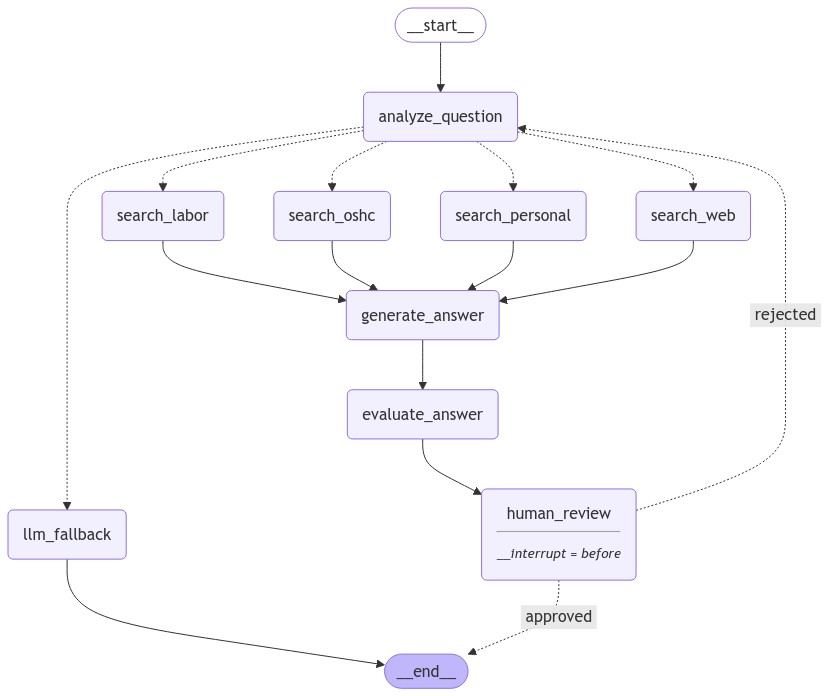

In [ ]:
from langgraph.checkpoint.memory import MemorySaver

# HITL 노드로 변경 (그라디오에서 입력을 처리)
def human_review(state: ResearchAgentState):
    pass

# 그래프 생성을 위한 StateGraph 객체를 정의
search_builder = StateGraph(ResearchAgentState)

# 노드 추가
nodes = {
    "analyze_question": analyze_question_tool_search,
    "search_personal": personal_rag_node,
    "search_labor": labor_rag_node,
    "search_oshc": oshc_rag_node,
    "search_web": web_rag_node,
    "generate_answer": answer_final,
    "llm_fallback": llm_fallback,
    "evaluate_answer": evaluate_answer_node, 
    "human_review": human_review,
}

for node_name, node_func in nodes.items():
    search_builder.add_node(node_name, node_func)

# 엣지 추가 (병렬 처리)
search_builder.add_edge(START, "analyze_question")
search_builder.add_conditional_edges(
    "analyze_question",
    route_datasources_tool_search,
    ["search_personal", "search_labor", "search_oshc", "search_web", "llm_fallback"]
)

# 검색 노드들을 generate_answer에 연결
for node in ["search_personal", "search_labor", "search_oshc", "search_web"]:
    search_builder.add_edge(node, "generate_answer")

search_builder.add_edge("generate_answer", "evaluate_answer")
search_builder.add_edge("evaluate_answer", "human_review")

# HITL 결과에 따른 조건부 엣지 추가
search_builder.add_conditional_edges(
    "human_review",
    lambda x: "approved" if x.get("user_decision") == "approved" else "rejected",
    {
        "approved": END,
        "rejected": "analyze_question"
    }
)

search_builder.add_edge("llm_fallback", END)

# 메모리 추가
memory = MemorySaver()

# 그래프 컴파일 (Breakpoint 설정)
legal_rag_agent = search_builder.compile(checkpointer=memory, interrupt_before=["human_review"])

# 그래프 시각화 
display(Image(legal_rag_agent.get_graph().draw_mermaid_png()))

# 

In [ ]:
import gradio as gr
import uuid
from typing import List, Tuple
from langgraph.checkpoint.memory import MemorySaver

# 메모리 사용 준비
memory = MemorySaver()
legal_rag_agent = search_builder.compile(checkpointer=memory, interrupt_before=["human_review"])

# 예시 질문들
example_questions = [
    "첫 출근 이전에도 해고를 시킬 수 있나요?  회사가 어려워져 채용 내정자를 채용하지 못할 것 같습니다.",
    "출근시 교통사고로 산재처리를 했는데, 산업재해조사표를 제출해야하나요?",
    "근로자가 4대보험 가입을 원하지 않아서 회사에서 4대보험에 가입하지 않았는데 괜찮을까요?",
]

# 챗봇 클래스 생성
class ChatBot:
    def __init__(self):
        self.thread_id = str(uuid.uuid4())
        self.user_decision = False

    def process_message(self, message: str) -> str:
        try:
            config = {"configurable": {"thread_id": self.thread_id}}
            
            if not self.user_decision:
                # Breakpoint 까지 먼저 실행
                inputs = {"question": message}
                legal_rag_agent.invoke(inputs, config=config)

                # Breakpoint에서 현재 상태를 출력하고, 사용자의 승인 여부를 입력받음 
                current_state = legal_rag_agent.get_state(config)
                print("Current state:", current_state)
                
                final_answer = current_state.values.get("final_answer", "No answer available")
                evaluation_report = current_state.values.get('evaluation_report', {'total_score': 0, 'brief_evaluation': 'No evaluation available'})
                
                response = f"""현재 답변:
            {final_answer}

            평가 결과:
            총점: {evaluation_report.get('total_score', 0)}/60
            {evaluation_report.get('brief_evaluation', 'No evaluation available')}

            이 답변을 승인하시겠습니까? (y/n): """
                
                # 사용자 승인 여부를 True로 변경 
                self.user_decision = True
                return response
                
            else:
                # 사용자 입력에 따라 다음 경로를 선택
                user_decision = message.lower()
                if user_decision == 'y':
                    self.user_decision = False # 초기화 
                    # 상태 업데이트 - 질문을 수정하여 업데이트
                    legal_rag_agent.update_state(config, {"user_decision": "approved"})
                    # 나머지 작업을 이어서 진행 
                    legal_rag_agent.invoke(None, config=config)
                    # 작업이 종료되고 최종 상태의 메시지를 출력 
                    current_state = legal_rag_agent.get_state(config)
                    print("Final state:", current_state)
                    return current_state.values.get("final_answer", "No final answer available")
                else:
                    self.user_decision = False # 초기화 
                    # 상태 업데이트 - 질문을 수정하여 업데이트
                    legal_rag_agent.update_state(config, {"user_decision": "rejected"})
                    # 나머지 작업을 이어서 진행 
                    legal_rag_agent.invoke(None, config=config)
                    # Breakpoint에서 현재 상태를 출력하고, 사용자의 승인 여부를 입력받음 
                    current_state = legal_rag_agent.get_state(config)
                    print("Revised state:", current_state)
                    
                    final_answer = current_state.values.get("final_answer", "No answer available")
                    evaluation_report = current_state.values.get('evaluation_report', {'total_score': 0, 'brief_evaluation': 'No evaluation available'})
                    
                    response = f"""다시 생성한 답변:
                {final_answer}

                평가 결과:
                총점: {evaluation_report.get('total_score', 0)}/60
                {evaluation_report.get('brief_evaluation', 'No evaluation available')}

                이 답변을 승인하시겠습니까? (y/n): """
                    
                    # 사용자 승인 여부를 True로 변경 
                    self.user_decision = True
                    return response

        except Exception as e:
            print(f"Error occurred: {str(e)}")
            return "죄송합니다. 응답을 생성하는 동안 오류가 발생했습니다. 다시 시도해 주세요."

    def chat(self, message: str, history: List[Tuple[str, str]]) -> str:
        print(f"Thread ID: {self.thread_id}")
        response = self.process_message(message)
        return response

chatbot = ChatBot()

# ChatInterface 생성
demo = gr.ChatInterface(
    fn=chatbot.chat,
    title="인사노무 법률 AI 어시스턴트 QA챗봇",
    description="인사규정(취업규칙), 근로기준법, 산업안전보건법 관련 질문에 답변해 드립니다.",
    examples=example_questions,
    theme=gr.themes.Soft()
)

# Gradio 앱 실행
demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [ ]:
demo.close()

Closing server running on port: 7860
